# Capstone Project - IMDB Data Set (Phase I to IV combined)

### Submitted by: Jwala R (Batch DS0822)

Phase I - Web Scrapping
Phase II - Querying using SQLite and Pandas SQL

The dataset taken into consideration is IMDB dataset. For the purpose of study, I have the top taken 1000 records available in the URL https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1

## Phase I and II

# WEB SCRAPPING

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the number of movies to scrape
num_movies = 1000

# Define the URL pattern for pagination
url_pattern = "https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1&start={}"

# Define lists to store the extracted data
first_csv_data = []
second_csv_data = []

# Scrape data from multiple pages
for start in range(1, num_movies + 1, 50):
    # Construct the URL for each page
    url = url_pattern.format(start)
    
    # Send a GET request to the IMDb URL
    response = requests.get(url)
    
    # Create BeautifulSoup object and find all movie items
    soup = BeautifulSoup(response.content, "html.parser")
    movie_items = soup.find_all("div", class_="lister-item-content")
    
    # Extract data for the first CSV file
    for item in movie_items:
        sno = item.find("span", class_="lister-item-index").text.replace(".", "")
        title = item.find("h3", class_="lister-item-header").find("a").text
        directors = item.find("p", class_="").find_all("a")
        director_names = [director.text for director in directors]
        duration = item.find("span", class_="runtime").text.strip(" min")
        year = item.find("span", class_="lister-item-year").text.strip("()")
        rating_element = item.find("div", class_="inline-block ratings-imdb-rating")
        rating = rating_element.strong.text if rating_element else "N/A"
        metascore_element = item.find("span", class_="metascore")
        metascore = metascore_element.text.strip() if metascore_element else "N/A"
        
        first_csv_data.append([sno, title, ", ".join(director_names), duration, year, rating, metascore])
    
    # Extract data for the second CSV file
    for item in movie_items:
        title = item.find("h3", class_="lister-item-header").find("a").text
        stars = item.find("p", class_="").find_all("a")[1:5]  # Exclude the first link (director)
        star_names = [star.text for star in stars]
        votes_element = item.find("p", class_="sort-num_votes-visible").find_all("span")
        votes = votes_element[1].text.replace(",", "") if len(votes_element) >= 2 else "N/A"
        genre_element = item.find("span", class_="genre")
        genre = genre_element.text.strip().split(", ") if genre_element else []
        gross_element = item.find("p", class_="sort-num_votes-visible").find_all("span")
        gross = gross_element[-1]["data-value"] if gross_element else "N/A"
        certification_element = item.find("span", class_="certificate")
        certification = certification_element.text.strip() if certification_element else "N/A"
        
        second_csv_data.append([title, ", ".join(star_names), votes, ", ".join(genre), gross, certification])

# Create dataframes from the extracted data
first_csv_df = pd.DataFrame(first_csv_data, columns=["Sno", "Movie Name", "Director Name", "Duration", "Year", "Ratings", "Metascore"])
second_csv_df = pd.DataFrame(second_csv_data, columns=["Movie Name", "Stars", "Votes", "Genre", "Gross Collection", "Certification"])

# Save dataframes to CSV files
first_csv_df.to_csv("first_csv_data.csv", index=False)
second_csv_df.to_csv("second_csv_data.csv", index=False)


In [2]:
first_csv_df

,Sno,Movie Name,Director Name,Duration,Year,Ratings,Metascore
0,1,The Dark Knight,"Christopher Nolan, Christian Bale, Heath Ledge...",152,2008,9.0,84
1,2,The Lord of the Rings: The Return of the King,"Peter Jackson, Elijah Wood, Viggo Mortensen, I...",201,2003,9.0,94
2,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",140,2023,8.9,86
3,4,Inception,"Christopher Nolan, Leonardo DiCaprio, Joseph G...",148,2010,8.8,74
4,5,The Lord of the Rings: The Fellowship of the Ring,"Peter Jackson, Elijah Wood, Ian McKellen, Orla...",178,2001,8.8,92
...,...,...,...,...,...,...,...
995,996,Ned Kelly,"Gregor Jordan, Heath Ledger, Orlando Bloom, Ge...",110,2003,6.4,56
996,997,Nochnoy dozor,"Timur Bekmambetov, Konstantin Khabenskiy, Vlad...",114,2004,6.4,58
997,998,Resident Evil: Degeneration,"Makoto Kamiya, Paul Mercier, Alyson Court, Lau...",97,2008,6.4,N/A
998,999,Dnevnoy dozor,"Timur Bekmambetov, Konstantin Khabenskiy, Mari...",132,2006,6.4,59


In [3]:
second_csv_df

,Movie Name,Stars,Votes,Genre,Gross Collection,Certification
0,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2750867,"Action, Crime, Drama","534,858,444",UA
1,The Lord of the Rings: The Return of the King,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1902861,"Action, Adventure, Drama","377,845,905",U
2,Spider-Man: Across the Spider-Verse,"Kemp Powers, Justin K. Thompson, Shameik Moore...",195285,"Animation, Action, Adventure",195285,U
3,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2441653,"Action, Adventure, Sci-Fi","292,576,195",UA
4,The Lord of the Rings: The Fellowship of the Ring,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1931145,"Action, Adventure, Drama","315,544,750",U
...,...,...,...,...,...,...
995,Ned Kelly,"Heath Ledger, Orlando Bloom, Geoffrey Rush, Na...",27655,"Action, Adventure, Biography","74,864",R
996,Nochnoy dozor,"Konstantin Khabenskiy, Vladimir Menshov, Mariy...",54779,"Action, Fantasy, Horror","1,487,477",R
997,Resident Evil: Degeneration,"Paul Mercier, Alyson Court, Laura Bailey, Roge...",32431,"Animation, Action, Horror",32431,R
998,Dnevnoy dozor,"Konstantin Khabenskiy, Mariya Poroshina, Vladi...",34981,"Action, Fantasy, Horror","450,686",R


# TABLE CREATION

In [4]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# Create the first table
cursor.execute('''CREATE TABLE IF NOT EXISTS first_table (
                    Sno INTEGER,
                    Movie_Name TEXT,
                    Director_Name TEXT,
                    Duration REAL,
                    Year TEXT,
                    Ratings REAL,
                    Metascore REAL
                )''')

# Create the second table
cursor.execute('''CREATE TABLE IF NOT EXISTS second_table (
                    Movie_Name TEXT,
                    Stars TEXT,
                    Votes INTEGER,
                    Genre TEXT,
                    Gross_Collection REAL,
                    Certification TEXT
                )''')

# Read data from the first CSV file
first_csv_df = pd.read_csv('first_csv_data.csv')

# Insert data into the first table
for _, row in first_csv_df.iterrows():
    year = row['Year'].replace('(', '').replace(')', '')  # Remove parentheses from the value
    cursor.execute('''INSERT INTO first_table (Sno, Movie_Name, Director_Name, Duration, Year, Ratings, Metascore)
                      VALUES (?, ?, ?, ?, ?, ?, ?)''',
                   (row['Sno'], row['Movie Name'], row['Director Name'], float(row['Duration']), year,
                    float(row['Ratings']), float(row['Metascore'])))

# Read data from the second CSV file
second_csv_df = pd.read_csv('second_csv_data.csv')

# Insert data into the second table
for _, row in second_csv_df.iterrows():
    gross_collection = row['Gross Collection'].replace(',', '')  # Remove commas from the value
    cursor.execute('''INSERT INTO second_table (Movie_Name, Stars, Votes, Genre, Gross_Collection, Certification)
                      VALUES (?, ?, ?, ?, ?, ?)''',
                   (row['Movie Name'], row['Stars'], int(row['Votes']), row['Genre'],
                    float(gross_collection), row['Certification']))

# Commit the changes and close the connection
conn.commit()
conn.close()



# QUERY USING SQLITE

In [5]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 1) Display all the details of movies created by directors Christopher and Matt Reeves using LIKE
cursor.execute('''SELECT *
                  FROM first_table
                  WHERE Director_Name LIKE '%Christopher%' OR Director_Name LIKE '%Matt Reeves%' ''')
result1 = cursor.fetchall()
print("Movies created by directors Christopher and Matt Reeves:")
for row in result1:
    print(row)
print()

# Close the connection
conn.close()


Movies created by directors Christopher and Matt Reeves:
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 152.0, 2008.0, 9.0, 84.0)
(4, 'Inception', 'Christopher Nolan, Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe', 148.0, 2010.0, 8.8, 74.0)
(22, 'The Dark Knight Rises', 'Christopher Nolan, Christian Bale, Tom Hardy, Anne Hathaway, Gary Oldman', 164.0, 2012.0, 8.4, 78.0)
(40, 'Batman Begins', 'Christopher Nolan, Christian Bale, Michael Caine, Ken Watanabe, Liam Neeson', 140.0, 2005.0, 8.2, 70.0)
(57, 'Mission: Impossible - Dead Reckoning Part One', 'Christopher McQuarrie, Tom Cruise, Hayley Atwell, Ving Rhames, Simon Pegg', 163.0, 2023.0, 8.1, 81.0)
(67, 'How to Train Your Dragon', 'Dean DeBlois, Chris Sanders, Jay Baruchel, Gerard Butler, Christopher Mintz-Plasse, Craig Ferguson', 98.0, 2010.0, 8.1, 75.0)
(131, 'The Batman', 'Matt Reeves, Robert Pattinson, Zoë Kravitz, Jeffrey Wright, Colin Farrell', 176.0, 2

In [6]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 2) Display all the details of movies with a duration of 140 minutes to 190 minutes
cursor.execute('''SELECT *
                  FROM first_table
                  WHERE Duration BETWEEN 140 AND 190''')
result2 = cursor.fetchall()

# Print the details of movies with a duration of 140 minutes to 190 minutes
print("Movies with a duration of 140 minutes to 190 minutes:")
for row in result2:
    print(row)
print()

# Close the connection
conn.close()


Movies with a duration of 140 minutes to 190 minutes:
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 152.0, 2008.0, 9.0, 84.0)
(3, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos, Kemp Powers, Justin K. Thompson, Shameik Moore, Hailee Steinfeld, Brian Tyree Henry, Luna Lauren Velez', 140.0, 2023.0, 8.9, 86.0)
(4, 'Inception', 'Christopher Nolan, Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe', 148.0, 2010.0, 8.8, 74.0)
(5, 'The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson, Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean', 178.0, 2001.0, 8.8, 92.0)
(6, 'The Lord of the Rings: The Two Towers', 'Peter Jackson, Elijah Wood, Ian McKellen, Viggo Mortensen, Orlando Bloom', 179.0, 2002.0, 8.8, 87.0)
(9, 'Soorarai Pottru', 'Sudha Kongara, Suriya, Paresh Rawal, Aparna Balamurali, Urvashi', 153.0, 2020.0, 8.7, None)
(14, 'Sita Ramam', 'Hanu Raghavapudi, Dulquer Salmaan, Mrunal Thakur, Ras

In [7]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 3) Display all details of movies with ratings above 7 in ascending order
cursor.execute('''SELECT *
                  FROM first_table
                  WHERE Ratings > 7
                  ORDER BY Ratings ASC''')
result3 = cursor.fetchall()

# Print the details of movies with ratings above 7 in ascending order
print("Movies with ratings above 7 in ascending order:")
for row in result3:
    print(row)
print()

# Close the connection
conn.close()


Movies with ratings above 7 in ascending order:
(432, 'The Flash', 'Andy Muschietti, Ezra Miller, Michael Keaton, Sasha Calle, Michael Shannon', 144.0, 2023.0, 7.1, 56.0)
(433, 'Extraction 2', 'Sam Hargrave, Chris Hemsworth, Golshifteh Farahani, Adam Bessa, Tornike Gogrichiani', 122.0, 2023.0, 7.1, 57.0)
(434, 'Mission: Impossible', 'Brian De Palma, Tom Cruise, Jon Voight, Emmanuelle Béart, Henry Czerny', 110.0, 1996.0, 7.1, 59.0)
(435, 'Man of Steel', 'Zack Snyder, Henry Cavill, Amy Adams, Michael Shannon, Diane Lane', 143.0, 2013.0, 7.1, 55.0)
(436, 'The Mummy', 'Stephen Sommers, Brendan Fraser, Rachel Weisz, John Hannah, Arnold Vosloo', 124.0, 1999.0, 7.1, 48.0)
(437, 'Tropic Thunder', 'Ben Stiller, Ben Stiller, Jack Black, Robert Downey Jr., Jeff Kahn', 107.0, 2008.0, 7.1, 71.0)
(438, 'Wrath of Man', 'Guy Ritchie, Jason Statham, Holt McCallany, Josh Hartnett, Rocci Boy Williams', 119.0, 2021.0, 7.1, 57.0)
(439, 'Free Guy', 'Shawn Levy, Ryan Reynolds, Jodie Comer, Taika Waititi, Lil

In [8]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 4) Display all movie names in descending order without repetition
cursor.execute('''SELECT DISTINCT Movie_Name
                  FROM first_table
                  ORDER BY Movie_Name DESC''')
result4 = cursor.fetchall()

# Print the movie names in descending order without repetition
print("Movie names in descending order without repetition:")
for row in result4:
    print(row[0])
print()

# Close the connection
conn.close()



Movie names in descending order without repetition:
Ölümlü Dünya
Zombieland: Double Tap
Zombieland
Zatôichi
Zack Snyder's Justice League
Yôjinbô
Young Guns II
Young Guns
You Only Live Twice
Yip Man chin chyun
Yip Man 4
Yip Man 3
Yip Man 2
Ying xiong
Yi dai zong shi
X: First Class
X2
X-Men: The Last Stand
X-Men: Days of Future Past
X-Men: Apocalypse
X-Men Origins: Wolverine
X-Men
Wyatt Earp
Wrath of Man
World War Z
Wonder Woman
WolfWalkers
Wo hu cang long
Willow
Wild Target
White Heat
Where Eagles Dare
What Happened to Monday
Westworld
We Were Soldiers
We Own the Night
Way Down
Watchmen
Wasabi
Warrior
Warcraft
WarGames
War of the Worlds
War for the Planet of the Apes
War Horse
War
Wanted
Waar
Vishwaroopam
Violent Night
Vikram Vedha
Vikram
Venom
Vantage Point
Vanishing Point
Vampire Hunter D: Bloodlust
Valerian and the City of a Thousand Planets
VR (Vikrant Rona)
V for Vendetta
Uri: The Surgical Strike
Upgrade
Unstoppable
Unleashed
Unknown
United 93
Underworld: Rise of the Lycans
Underwo

In [9]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 5) Display movie names that start with 'P' and their rating is greater than 7 without repetition
cursor.execute('''SELECT DISTINCT Movie_Name
                  FROM first_table
                  WHERE Movie_Name LIKE 'P%' AND Ratings > 7''')
result5 = cursor.fetchall()

# Print the movie names that start with 'P' and have a rating greater than 7 without repetition
print("Movie names starting with 'P' and rating greater than 7 without repetition:")
for row in result5:
    print(row[0])
print()

# Close the connection
conn.close()



Movie names starting with 'P' and rating greater than 7 without repetition:
Paan Singh Tomar
Pirates of the Caribbean: The Curse of the Black Pearl
Per un pugno di dollari
Predator
Ponniyin Selvan: I
Pushpa: The Rise - Part 1
Predestination
Pirates of the Caribbean: Dead Man's Chest
Patriots Day
Point Break
Prey
Pirates of the Caribbean: At World's End
Planet Terror
Payback



In [10]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 1) Display all movie names with star Arnold Schwarzenegger in ascending order without repetition
cursor.execute('''SELECT DISTINCT Movie_Name
                  FROM second_table
                  WHERE Stars LIKE '%Arnold Schwarzenegger%'
                  ORDER BY Movie_Name ASC''')
result1 = cursor.fetchall()

# Print the movie names with the star Arnold Schwarzenegger in ascending order without repetition
print("Movie names with star Arnold Schwarzenegger in ascending order without repetition:")
for row in result1:
    print(row[0])
print()

# Close the connection
conn.close()



Movie names with star Arnold Schwarzenegger in ascending order without repetition:
Commando
Conan the Barbarian
Escape Plan
Last Action Hero
Predator
Terminator 2: Judgment Day
The Running Man
The Terminator
Total Recall
True Lies



In [11]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 2) Display all details of the movie with the highest number of votes without repetition
cursor.execute('''SELECT *
                  FROM second_table
                  WHERE Votes = (SELECT MAX(Votes) FROM second_table)
                  LIMIT 1''')
result2 = cursor.fetchall()

# Print the details of the movie with the highest number of votes
print("Details of the movie with the highest number of votes:")
for row in result2:
    print(row)
print()

# Close the connection
conn.close()


Details of the movie with the highest number of votes:
('The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 2750867, 'Action, Crime, Drama', 534858444.0, 'UA')



In [12]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 3) Display movie names with gross collections in descending order without repetition
cursor.execute('''SELECT DISTINCT Movie_Name
                  FROM second_table
                  ORDER BY Gross_Collection DESC''')
result3 = cursor.fetchall()

# Print the movie names with gross collections in descending order without repetition
print("Movie names with gross collections in descending order without repetition:")
for row in result3:
    print(row[0])
print()

# Close the connection
conn.close()


Movie names with gross collections in descending order without repetition:
Star Wars: Episode VII - The Force Awakens
Avengers: Endgame
Spider-Man: No Way Home
Avatar
Top Gun: Maverick
Black Panther
Avengers: Infinity War
Avatar: The Way of Water
Jurassic World
The Avengers
Star Wars: Episode VIII - The Last Jedi
Incredibles 2
The Dark Knight
Rogue One
Star Wars: Episode IX - The Rise of Skywalker
Star Wars: Episode I - The Phantom Menace
Avengers: Age of Ultron
Black Panther: Wakanda Forever
The Dark Knight Rises
Captain Marvel
The Hunger Games: Catching Fire
Pirates of the Caribbean: Dead Man's Chest
Wonder Woman
Doctor Strange in the Multiverse of Madness
Iron Man Three
Captain America: Civil War
The Hunger Games
Jumanji: Welcome to the Jungle
Spider-Man
Jurassic Park
Spider-Man: Far from Home
Guardians of the Galaxy Vol. 2
Star Wars: Episode III - Revenge of the Sith
The Lord of the Rings: The Return of the King
Spider-Man 2
The Batman
Deadpool
Fast & Furious 7
American Sniper
The 

In [13]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 4) Display the gross collection of movies with the star Arnold without repetition
cursor.execute('''SELECT DISTINCT Movie_Name, Gross_Collection
                  FROM second_table
                  WHERE Stars LIKE '%Arnold Schwarzenegger%' ''')
result4 = cursor.fetchall()

# Print the gross collection of movies with the star Arnold Schwarzenegger without repetition
print("Gross collection of movies with the star Arnold Schwarzenegger without repetition:")
for row in result4:
    print("Movie Name:", row[0])
    print("Gross Collection:", row[1])
    print()

# Close the connection
conn.close()


Gross collection of movies with the star Arnold Schwarzenegger without repetition:
Movie Name: Terminator 2: Judgment Day
Gross Collection: 204843350.0

Movie Name: The Terminator
Gross Collection: 38400000.0

Movie Name: Predator
Gross Collection: 59735548.0

Movie Name: Total Recall
Gross Collection: 119394840.0

Movie Name: True Lies
Gross Collection: 146282411.0

Movie Name: Conan the Barbarian
Gross Collection: 39565475.0

Movie Name: Commando
Gross Collection: 35100000.0

Movie Name: Escape Plan
Gross Collection: 25132228.0

Movie Name: The Running Man
Gross Collection: 38122105.0

Movie Name: Last Action Hero
Gross Collection: 50016394.0



In [14]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# 5) Display all details of movies with comedy and action genres without repetition
cursor.execute('''SELECT DISTINCT *
                  FROM second_table
                  WHERE Genre LIKE '%comedy%' AND Genre LIKE '%action%' ''')
result5 = cursor.fetchall()

# Print the details of movies with comedy and action genres without repetition
print("Details of movies with comedy and action genres without repetition:")
for row in result5:
    print(row)
    print()

# Close the connection
conn.close()


Details of movies with comedy and action genres without repetition:
('Gangs of Wasseypur', 'Manoj Bajpayee, Nawazuddin Siddiqui, Tigmanshu Dhulia, Richa Chadha', 99855, 'Action, Comedy, Crime', 99855.0, 'A')

('Sherlock Jr.', 'Buster Keaton, Kathryn McGuire, Joe Keaton, Erwin Connelly', 53068, 'Action, Comedy, Romance', 977375.0, None)

('Guardians of the Galaxy Vol. 3', 'Chris Pratt, Chukwudi Iwuji, Bradley Cooper, Pom Klementieff', 212902, 'Action, Adventure, Comedy', 212902.0, 'UA')

('Lock, Stock and Two Smoking Barrels', 'Jason Flemyng, Dexter Fletcher, Nick Moran, Jason Statham', 597766, 'Action, Comedy, Crime', 3897569.0, 'A')

('Bajrangi Bhaijaan', 'Mehmet Tutkun, Salman Khan, Harshaali Malhotra, Nawazuddin Siddiqui', 92617, 'Action, Adventure, Comedy', 8178001.0, 'UA')

('The General', 'Buster Keaton, Buster Keaton, Marion Mack, Glen Cavender', 94505, 'Action, Adventure, Comedy', 1033895.0, None)

('Hera Pheri', 'Akshay Kumar, Suniel Shetty, Paresh Rawal, Tabu', 69839, 'Action

In [15]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# Display all details from both tables where movie names are the same without repetition
cursor.execute('''SELECT DISTINCT *
                  FROM first_table
                  INNER JOIN second_table ON first_table.Movie_Name = second_table.Movie_Name''')
result = cursor.fetchall()

# Print the details where movie names are the same without repetition
print("Details from both tables where movie names are the same without repetition:")
for row in result:
    print(row)
    print()

# Close the connection
conn.close()



Details from both tables where movie names are the same without repetition:
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 152.0, 2008.0, 9.0, 84.0, 'The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 2738965, 'Action, Crime, Drama', 534858444.0, 'UA')

(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 152.0, 2008.0, 9.0, 84.0, 'The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 2750867, 'Action, Crime, Drama', 534858444.0, 'UA')

(2, 'The Lord of the Rings: The Return of the King', 'Peter Jackson, Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom', 201.0, 2003.0, 9.0, 94.0, 'The Lord of the Rings: The Return of the King', 'Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom', 1897977, 'Action, Adventure, Drama', 377845905.0, 'U')

(2, 'The Lord of the Rings: The Return of the King', 'Peter Jackson, Elijah

In [16]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# Display all movie names, directors, ratings, and gross collection where the genre is action without repetition
cursor.execute('''SELECT DISTINCT first_table.Movie_Name, first_table.Director_Name, first_table.Ratings, second_table.Gross_Collection
                  FROM first_table
                  INNER JOIN second_table ON first_table.Movie_Name = second_table.Movie_Name
                  WHERE second_table.Genre LIKE '%action%' ''')
result = cursor.fetchall()

# Print the details where the genre is action without repetition
print("Movie names, directors, ratings, and gross collection where the genre is action without repetition:")
for row in result:
    print("Movie Name:", row[0])
    print("Director:", row[1])
    print("Ratings:", row[2])
    print("Gross Collection:", row[3])
    print()

# Close the connection
conn.close()


Movie names, directors, ratings, and gross collection where the genre is action without repetition:
Movie Name: The Dark Knight
Director: Christopher Nolan, Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine
Ratings: 9.0
Gross Collection: 534858444.0

Movie Name: The Lord of the Rings: The Return of the King
Director: Peter Jackson, Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom
Ratings: 9.0
Gross Collection: 377845905.0

Movie Name: Spider-Man: Across the Spider-Verse
Director: Joaquim Dos Santos, Kemp Powers, Justin K. Thompson, Shameik Moore, Hailee Steinfeld, Brian Tyree Henry, Luna Lauren Velez
Ratings: 8.9
Gross Collection: 182105.0

Movie Name: Inception
Director: Christopher Nolan, Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe
Ratings: 8.8
Gross Collection: 292576195.0

Movie Name: The Lord of the Rings: The Fellowship of the Ring
Director: Peter Jackson, Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean
Ratings: 8.8
Gross Collection: 3

In [17]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# Display all details from both tables with the highest gross collection without repetition
cursor.execute('''SELECT DISTINCT *
                  FROM first_table
                  INNER JOIN second_table ON first_table.Movie_Name = second_table.Movie_Name
                  WHERE second_table.Gross_Collection = (SELECT MAX(Gross_Collection) FROM second_table)''')
result = cursor.fetchall()

# Print the details with the highest gross collection without repetition
print("Details from both tables with the highest gross collection without repetition:")
for row in result:
    print(row)
    print()

# Close the connection
conn.close()


Details from both tables with the highest gross collection without repetition:
(136, 'Star Wars: Episode VII - The Force Awakens', 'J.J. Abrams, Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson', 138.0, 2015.0, 7.8, 80.0, 'Star Wars: Episode VII - The Force Awakens', 'Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson', 950925, 'Action, Adventure, Sci-Fi', 936662225.0, 'U')

(143, 'Star Wars: Episode VII - The Force Awakens', 'J.J. Abrams, Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson', 138.0, 2015.0, 7.8, 80.0, 'Star Wars: Episode VII - The Force Awakens', 'Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson', 950925, 'Action, Adventure, Sci-Fi', 936662225.0, 'U')

(136, 'Star Wars: Episode VII - The Force Awakens', 'J.J. Abrams, Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson', 138.0, 2015.0, 7.8, 80.0, 'Star Wars: Episode VII - The Force Awakens', 'Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson', 952319, 'Action, Adventure, Sci-Fi', 9

In [18]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# Display all details from both tables with the highest ratings without repetition
cursor.execute('''SELECT DISTINCT *
                  FROM first_table
                  INNER JOIN second_table ON first_table.Movie_Name = second_table.Movie_Name
                  WHERE first_table.Ratings = (SELECT MAX(Ratings) FROM first_table)''')
result = cursor.fetchall()

# Print the details with the highest ratings without repetition
print("Details from both tables with the highest ratings without repetition:")
for row in result:
    print(row)
    print()

# Close the connection
conn.close()


Details from both tables with the highest ratings without repetition:
(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 152.0, 2008.0, 9.0, 84.0, 'The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 2738965, 'Action, Crime, Drama', 534858444.0, 'UA')

(1, 'The Dark Knight', 'Christopher Nolan, Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 152.0, 2008.0, 9.0, 84.0, 'The Dark Knight', 'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine', 2750867, 'Action, Crime, Drama', 534858444.0, 'UA')

(2, 'The Lord of the Rings: The Return of the King', 'Peter Jackson, Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom', 201.0, 2003.0, 9.0, 94.0, 'The Lord of the Rings: The Return of the King', 'Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom', 1897977, 'Action, Adventure, Drama', 377845905.0, 'U')

(2, 'The Lord of the Rings: The Return of the King', 'Peter Jackson, Elijah Wood,

# QUERY USING PANDAS SQL

In [19]:


# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select movies created by directors Christopher and Matt Reeves using LIKE without repetition
query = '''SELECT DISTINCT *
           FROM first_table
           WHERE Director_Name LIKE '%Christopher%' OR Director_Name LIKE '%Matt%' '''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the details of movies created by Christopher and Matt Reeves without repetition
print("Details of movies created by Christopher and Matt Reeves without repetition:")
print(df)

# Close the connection
conn.close()



Details of movies created by Christopher and Matt Reeves without repetition:
     Sno                                     Movie_Name  \
0      1                                The Dark Knight   
1      4                                      Inception   
2     22                          The Dark Knight Rises   
3     40                                  Batman Begins   
4     57  Mission: Impossible - Dead Reckoning Part One   
..   ...                                            ...   
140  898                                      Self/less   
141  933                                Army of Thieves   
142  939                              Last Man Standing   
143  970                                    Black Death   
144  971                                   The Prophecy   

                                         Director_Name  Duration    Year  \
0    Christopher Nolan, Christian Bale, Heath Ledge...     152.0  2008.0   
1    Christopher Nolan, Leonardo DiCaprio, Joseph G...     148

In [20]:
df

,Sno,Movie_Name,Director_Name,Duration,Year,Ratings,Metascore
0,1,The Dark Knight,"Christopher Nolan, Christian Bale, Heath Ledge...",152.0,2008.0,9.0,84.0
1,4,Inception,"Christopher Nolan, Leonardo DiCaprio, Joseph G...",148.0,2010.0,8.8,74.0
2,22,The Dark Knight Rises,"Christopher Nolan, Christian Bale, Tom Hardy, ...",164.0,2012.0,8.4,78.0
3,40,Batman Begins,"Christopher Nolan, Christian Bale, Michael Cai...",140.0,2005.0,8.2,70.0
4,57,Mission: Impossible - Dead Reckoning Part One,"Christopher McQuarrie, Tom Cruise, Hayley Atwe...",163.0,2023.0,8.1,81.0
...,...,...,...,...,...,...,...
140,898,Self/less,"Tarsem Singh, Ryan Reynolds, Natalie Martinez,...",117.0,2015.0,6.5,34.0
141,933,Army of Thieves,"Matthias Schweighöfer, Matthias Schweighöfer, ...",127.0,2021.0,6.4,49.0
142,939,Last Man Standing,"Walter Hill, Bruce Willis, Bruce Dern, William...",101.0,1996.0,6.4,44.0
143,970,Black Death,"Christopher Smith, Eddie Redmayne, Sean Bean, ...",102.0,2010.0,6.4,71.0


In [21]:


# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select movies with duration between 140 and 190 minutes without repetition
query = '''SELECT DISTINCT *
           FROM first_table
           WHERE Duration BETWEEN 140 AND 190'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the details of movies with duration between 140 and 190 minutes without repetition
print("Details of movies with duration between 140 and 190 minutes without repetition:")
print(df)

# Close the connection
conn.close()


Details of movies with duration between 140 and 190 minutes without repetition:
     Sno                                         Movie_Name  \
0      1                                    The Dark Knight   
1      3                Spider-Man: Across the Spider-Verse   
2      4                                          Inception   
3      5  The Lord of the Rings: The Fellowship of the Ring   
4      6              The Lord of the Rings: The Two Towers   
..   ...                                                ...   
275  919                                                War   
276  920                                            Dhoom:2   
277  923                                         Fetih 1453   
278  924                 Batman v Superman: Dawn of Justice   
279  950                                    The Lone Ranger   

                                         Director_Name  Duration    Year  \
0    Christopher Nolan, Christian Bale, Heath Ledge...     152.0  2008.0   
1    Joaqui

In [22]:
df

,Sno,Movie_Name,Director_Name,Duration,Year,Ratings,Metascore
0,1,The Dark Knight,"Christopher Nolan, Christian Bale, Heath Ledge...",152.0,2008.0,9.0,84.0
1,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",140.0,2023.0,8.9,86.0
2,4,Inception,"Christopher Nolan, Leonardo DiCaprio, Joseph G...",148.0,2010.0,8.8,74.0
3,5,The Lord of the Rings: The Fellowship of the Ring,"Peter Jackson, Elijah Wood, Ian McKellen, Orla...",178.0,2001.0,8.8,92.0
4,6,The Lord of the Rings: The Two Towers,"Peter Jackson, Elijah Wood, Ian McKellen, Vigg...",179.0,2002.0,8.8,87.0
...,...,...,...,...,...,...,...
275,919,War,"Siddharth Anand, Hrithik Roshan, Tiger Shroff,...",154.0,2019.0,6.5,NaN
276,920,Dhoom:2,"Sanjay Gadhvi, Hrithik Roshan, Abhishek Bachch...",152.0,2006.0,6.5,NaN
277,923,Fetih 1453,"Faruk Aksoy, Devrim Evin, Ibrahim Celikkol, Di...",162.0,2012.0,6.5,NaN
278,924,Batman v Superman: Dawn of Justice,"Zack Snyder, Ben Affleck, Henry Cavill, Amy Ad...",151.0,2016.0,6.4,44.0


In [23]:


# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select movies with ratings above 7 in ascending order without repetition
query = '''SELECT DISTINCT *
           FROM first_table
           WHERE Ratings > 7
           ORDER BY Ratings ASC'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the details of movies with ratings above 7 in ascending order without repetition
print("Details of movies with ratings above 7 in ascending order without repetition:")
print(df)

# Close the connection
conn.close()


Details of movies with ratings above 7 in ascending order without repetition:
     Sno                                         Movie_Name  \
0    432                                          The Flash   
1    433                                       Extraction 2   
2    434                                Mission: Impossible   
3    435                                       Man of Steel   
4    436                                          The Mummy   
..   ...                                                ...   
869    5  The Lord of the Rings: The Fellowship of the Ring   
870    6              The Lord of the Rings: The Two Towers   
871    3                Spider-Man: Across the Spider-Verse   
872    1                                    The Dark Knight   
873    2      The Lord of the Rings: The Return of the King   

                                         Director_Name  Duration    Year  \
0    Andy Muschietti, Ezra Miller, Michael Keaton, ...     144.0  2023.0   
1    Sam Harg

In [24]:
df

,Sno,Movie_Name,Director_Name,Duration,Year,Ratings,Metascore
0,432,The Flash,"Andy Muschietti, Ezra Miller, Michael Keaton, ...",144.0,2023.0,7.1,56.0
1,433,Extraction 2,"Sam Hargrave, Chris Hemsworth, Golshifteh Fara...",122.0,2023.0,7.1,57.0
2,434,Mission: Impossible,"Brian De Palma, Tom Cruise, Jon Voight, Emmanu...",110.0,1996.0,7.1,59.0
3,435,Man of Steel,"Zack Snyder, Henry Cavill, Amy Adams, Michael ...",143.0,2013.0,7.1,55.0
4,436,The Mummy,"Stephen Sommers, Brendan Fraser, Rachel Weisz,...",124.0,1999.0,7.1,48.0
...,...,...,...,...,...,...,...
869,5,The Lord of the Rings: The Fellowship of the Ring,"Peter Jackson, Elijah Wood, Ian McKellen, Orla...",178.0,2001.0,8.8,92.0
870,6,The Lord of the Rings: The Two Towers,"Peter Jackson, Elijah Wood, Ian McKellen, Vigg...",179.0,2002.0,8.8,87.0
871,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",140.0,2023.0,8.9,86.0
872,1,The Dark Knight,"Christopher Nolan, Christian Bale, Heath Ledge...",152.0,2008.0,9.0,84.0


In [25]:

# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select all movie names in descending order without repetition
query = '''SELECT DISTINCT Movie_Name
           FROM first_table
           ORDER BY Movie_Name DESC'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the movie names in descending order without repetition
print("Movie names in descending order without repetition:")
print(df)

# Close the connection
conn.close()


Movie names in descending order without repetition:
                       Movie_Name
0                    Ölümlü Dünya
1          Zombieland: Double Tap
2                      Zombieland
3                        Zatôichi
4    Zack Snyder's Justice League
..                            ...
993                     16 Blocks
994                      13 Hours
995                     12 Strong
996               1 - Nenokkadine
997                           '71

[998 rows x 1 columns]


In [26]:
df

,Movie_Name
0,Ölümlü Dünya
1,Zombieland: Double Tap
2,Zombieland
3,Zatôichi
4,Zack Snyder's Justice League
...,...
993,16 Blocks
994,13 Hours
995,12 Strong
996,1 - Nenokkadine


In [27]:


# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select movie names that start with 'P' and their rating is greater than 7 without repetition
query = '''SELECT DISTINCT Movie_Name
           FROM first_table
           WHERE Movie_Name LIKE 'P%' AND Ratings > 7'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the movie names that start with 'P' and their rating is greater than 7 without repetition
print("Movie names that start with 'P' and their rating is greater than 7 without repetition:")
print(df)

# Close the connection
conn.close()


Movie names that start with 'P' and their rating is greater than 7 without repetition:
                                           Movie_Name
0                                    Paan Singh Tomar
1   Pirates of the Caribbean: The Curse of the Bla...
2                             Per un pugno di dollari
3                                            Predator
4                                  Ponniyin Selvan: I
5                           Pushpa: The Rise - Part 1
6                                      Predestination
7          Pirates of the Caribbean: Dead Man's Chest
8                                        Patriots Day
9                                         Point Break
10                                               Prey
11           Pirates of the Caribbean: At World's End
12                                      Planet Terror
13                                            Payback


In [28]:
df

,Movie_Name
0,Paan Singh Tomar
1,Pirates of the Caribbean: The Curse of the Bla...
2,Per un pugno di dollari
3,Predator
4,Ponniyin Selvan: I
5,Pushpa: The Rise - Part 1
6,Predestination
7,Pirates of the Caribbean: Dead Man's Chest
8,Patriots Day
9,Point Break


In [29]:


# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select distinct movie names with star Arnold Schwarzenegger in ascending order
query = '''SELECT DISTINCT Movie_Name
           FROM second_table
           WHERE Stars LIKE '%Arnold Schwarzenegger%'
           ORDER BY Movie_Name ASC'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the movie names with star Arnold Schwarzenegger in ascending order without repetition
print("Movie names with star Arnold Schwarzenegger in ascending order without repetition:")
print(df)

# Close the connection
conn.close()


Movie names with star Arnold Schwarzenegger in ascending order without repetition:
                   Movie_Name
0                    Commando
1         Conan the Barbarian
2                 Escape Plan
3            Last Action Hero
4                    Predator
5  Terminator 2: Judgment Day
6             The Running Man
7              The Terminator
8                Total Recall
9                   True Lies


In [30]:
df

,Movie_Name
0,Commando
1,Conan the Barbarian
2,Escape Plan
3,Last Action Hero
4,Predator
5,Terminator 2: Judgment Day
6,The Running Man
7,The Terminator
8,Total Recall
9,True Lies


In [31]:

# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select all details of the movie with the highest number of votes without repetition
query = '''SELECT *
           FROM second_table
           WHERE Votes = (SELECT MAX(Votes) FROM second_table)
           LIMIT 1'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the details of the movie with the highest number of votes without repetition
print("Details of the movie with the highest number of votes without repetition:")
print(df)

# Close the connection
conn.close()


Details of the movie with the highest number of votes without repetition:
        Movie_Name                                              Stars  \
0  The Dark Knight  Christian Bale, Heath Ledger, Aaron Eckhart, M...   

     Votes                 Genre  Gross_Collection Certification  
0  2750867  Action, Crime, Drama       534858444.0            UA  


In [32]:
df

,Movie_Name,Stars,Votes,Genre,Gross_Collection,Certification
0,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2750867,"Action, Crime, Drama",534858444.0,UA


In [33]:


# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select movie names with gross collections in descending order without repetition
query = '''SELECT DISTINCT Movie_Name, Gross_Collection
           FROM second_table
           ORDER BY Gross_Collection DESC'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the movie names with gross collections in descending order without repetition
print("Movie names with gross collections in descending order without repetition:")
print(df)

# Close the connection
conn.close()


Movie names with gross collections in descending order without repetition:
                                      Movie_Name  Gross_Collection
0     Star Wars: Episode VII - The Force Awakens       936662225.0
1                              Avengers: Endgame       858373000.0
2                        Spider-Man: No Way Home       804747988.0
3                                         Avatar       760507625.0
4                              Top Gun: Maverick       718732821.0
...                                          ...               ...
1152                              Tropa de Elite            8060.0
1153                                     Ajeossi            6460.0
1154                               The Salvation            5000.0
1155                   Knockin' on Heaven's Door            3296.0
1156                                Son of a Gun            1411.0

[1157 rows x 2 columns]


In [34]:
df

,Movie_Name,Gross_Collection
0,Star Wars: Episode VII - The Force Awakens,936662225.0
1,Avengers: Endgame,858373000.0
2,Spider-Man: No Way Home,804747988.0
3,Avatar,760507625.0
4,Top Gun: Maverick,718732821.0
...,...,...
1152,Tropa de Elite,8060.0
1153,Ajeossi,6460.0
1154,The Salvation,5000.0
1155,Knockin' on Heaven's Door,3296.0


In [35]:


# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select the gross collection of movies with the star Arnold without repetition
query = '''SELECT DISTINCT Movie_Name, Gross_Collection
           FROM second_table
           WHERE Stars LIKE '%Arnold%'
           ORDER BY Gross_Collection'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the gross collection of movies with the star Arnold without repetition
print("Gross collection of movies with the star Arnold without repetition:")
print(df)

# Close the connection
conn.close()


Gross collection of movies with the star Arnold without repetition:
                    Movie_Name  Gross_Collection
0                  Escape Plan        25132228.0
1                     Commando        35100000.0
2              The Running Man        38122105.0
3               The Terminator        38400000.0
4          Conan the Barbarian        39565475.0
5             Last Action Hero        50016394.0
6                     Predator        59735548.0
7                 Total Recall       119394840.0
8                    True Lies       146282411.0
9                    The Mummy       155247825.0
10           The Mummy Returns       202019785.0
11  Terminator 2: Judgment Day       204843350.0


In [36]:
df

,Movie_Name,Gross_Collection
0,Escape Plan,25132228.0
1,Commando,35100000.0
2,The Running Man,38122105.0
3,The Terminator,38400000.0
4,Conan the Barbarian,39565475.0
5,Last Action Hero,50016394.0
6,Predator,59735548.0
7,Total Recall,119394840.0
8,True Lies,146282411.0
9,The Mummy,155247825.0


In [37]:

# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select all details of movies with comedy and action genres without repetition
query = '''SELECT DISTINCT *
           FROM second_table
           WHERE Genre LIKE '%comedy%' AND Genre LIKE '%action%' '''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the details of movies with comedy and action genres without repetition
print("Details of movies with comedy and action genres without repetition:")
print(df)

# Close the connection
conn.close()


Details of movies with comedy and action genres without repetition:
                              Movie_Name  \
0                     Gangs of Wasseypur   
1                           Sherlock Jr.   
2         Guardians of the Galaxy Vol. 3   
3    Lock, Stock and Two Smoking Barrels   
4                      Bajrangi Bhaijaan   
..                                   ...   
324                         Tango & Cash   
325                        Let's Be Cops   
326                  Here Comes the Boom   
327                                Shaft   
328                           Redirected   

                                                 Stars   Votes  \
0    Manoj Bajpayee, Nawazuddin Siddiqui, Tigmanshu...   99855   
1    Buster Keaton, Kathryn McGuire, Joe Keaton, Er...   53068   
2    Chris Pratt, Chukwudi Iwuji, Bradley Cooper, P...  212902   
3    Jason Flemyng, Dexter Fletcher, Nick Moran, Ja...  597766   
4    Mehmet Tutkun, Salman Khan, Harshaali Malhotra...   92617   
..     

In [38]:
df

,Movie_Name,Stars,Votes,Genre,Gross_Collection,Certification
0,Gangs of Wasseypur,"Manoj Bajpayee, Nawazuddin Siddiqui, Tigmanshu...",99855,"Action, Comedy, Crime",99855.0,A
1,Sherlock Jr.,"Buster Keaton, Kathryn McGuire, Joe Keaton, Er...",53068,"Action, Comedy, Romance",977375.0,None
2,Guardians of the Galaxy Vol. 3,"Chris Pratt, Chukwudi Iwuji, Bradley Cooper, P...",212902,"Action, Adventure, Comedy",212902.0,UA
3,"Lock, Stock and Two Smoking Barrels","Jason Flemyng, Dexter Fletcher, Nick Moran, Ja...",597766,"Action, Comedy, Crime",3897569.0,A
4,Bajrangi Bhaijaan,"Mehmet Tutkun, Salman Khan, Harshaali Malhotra...",92617,"Action, Adventure, Comedy",8178001.0,UA
...,...,...,...,...,...,...
324,Tango & Cash,"Albert Magnoli, Sylvester Stallone, Kurt Russe...",110166,"Action, Comedy, Crime",63408614.0,UA
325,Let's Be Cops,"Jake Johnson, Damon Wayans Jr., Rob Riggle, Ni...",137745,"Action, Comedy, Crime",82390774.0,R
326,Here Comes the Boom,"Kevin James, Salma Hayek, Henry Winkler, Greg ...",93808,"Action, Comedy, Sport",45290318.0,PG
327,Shaft,"Samuel L. Jackson, Jessie T. Usher, Richard Ro...",56604,"Action, Comedy, Crime",21360215.0,UA


In [39]:


# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select all details from both tables where movie names are the same without repetition
query = '''SELECT DISTINCT *
           FROM first_table
           INNER JOIN second_table ON first_table.Movie_Name = second_table.Movie_Name'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the details from both tables where movie names are the same without repetition
print("Details from both tables where movie names are the same without repetition:")
print(df)

# Close the connection
conn.close()


Details from both tables where movie names are the same without repetition:
        Sno                                     Movie_Name  \
0         1                                The Dark Knight   
1         1                                The Dark Knight   
2         2  The Lord of the Rings: The Return of the King   
3         2  The Lord of the Rings: The Return of the King   
4         3            Spider-Man: Across the Spider-Verse   
...     ...                                            ...   
3711    998                    Resident Evil: Degeneration   
3712    999                                  Dnevnoy dozor   
3713    999                                  Dnevnoy dozor   
3714  1,000                                     Redirected   
3715  1,000                                     Redirected   

                                          Director_Name  Duration    Year  \
0     Christopher Nolan, Christian Bale, Heath Ledge...     152.0  2008.0   
1     Christopher Nolan, 

In [40]:
df

,Sno,Movie_Name,Director_Name,Duration,Year,Ratings,Metascore,Movie_Name,Stars,Votes,Genre,Gross_Collection,Certification
0,1,The Dark Knight,"Christopher Nolan, Christian Bale, Heath Ledge...",152.0,2008.0,9.0,84.0,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2738965,"Action, Crime, Drama",534858444.0,UA
1,1,The Dark Knight,"Christopher Nolan, Christian Bale, Heath Ledge...",152.0,2008.0,9.0,84.0,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2750867,"Action, Crime, Drama",534858444.0,UA
2,2,The Lord of the Rings: The Return of the King,"Peter Jackson, Elijah Wood, Viggo Mortensen, I...",201.0,2003.0,9.0,94.0,The Lord of the Rings: The Return of the King,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1897977,"Action, Adventure, Drama",377845905.0,U
3,2,The Lord of the Rings: The Return of the King,"Peter Jackson, Elijah Wood, Viggo Mortensen, I...",201.0,2003.0,9.0,94.0,The Lord of the Rings: The Return of the King,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1902861,"Action, Adventure, Drama",377845905.0,U
4,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",140.0,2023.0,8.9,86.0,Spider-Man: Across the Spider-Verse,"Kemp Powers, Justin K. Thompson, Shameik Moore...",182105,"Animation, Action, Adventure",182105.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,998,Resident Evil: Degeneration,"Makoto Kamiya, Paul Mercier, Alyson Court, Lau...",97.0,2008.0,6.4,NaN,Resident Evil: Degeneration,"Paul Mercier, Alyson Court, Laura Bailey, Roge...",32431,"Animation, Action, Horror",32431.0,R
3712,999,Dnevnoy dozor,"Timur Bekmambetov, Konstantin Khabenskiy, Mari...",132.0,2006.0,6.4,59.0,Dnevnoy dozor,"Konstantin Khabenskiy, Mariya Poroshina, Vladi...",34964,"Action, Fantasy, Horror",450686.0,R
3713,999,Dnevnoy dozor,"Timur Bekmambetov, Konstantin Khabenskiy, Mari...",132.0,2006.0,6.4,59.0,Dnevnoy dozor,"Konstantin Khabenskiy, Mariya Poroshina, Vladi...",34981,"Action, Fantasy, Horror",450686.0,R
3714,"1,000",Redirected,"Emilis Velyvis, Vinnie Jones, Scot Williams, G...",99.0,2014.0,6.4,NaN,Redirected,"Vinnie Jones, Scot Williams, Gil Darnell, Oliv...",34350,"Action, Comedy, Crime",34350.0,None


In [41]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select movie names, directors, ratings, and gross collections where the genre is action without repetition
query = '''SELECT DISTINCT second_table.Movie_Name, second_table.Stars AS Director, second_table.Votes, second_table.Gross_Collection
           FROM second_table
           WHERE second_table.Genre LIKE '%action%' '''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the movie names, directors, ratings, and gross collections where the genre is action without repetition
print("Movie names, directors, votes, and gross collections where the genre is action without repetition:")
print(df)

# Close the connection
conn.close()



Movie names, directors, votes, and gross collections where the genre is action without repetition:
                                             Movie_Name  \
0                                       The Dark Knight   
1         The Lord of the Rings: The Return of the King   
2                   Spider-Man: Across the Spider-Verse   
3                                             Inception   
4     The Lord of the Rings: The Fellowship of the Ring   
...                                                 ...   
1994                                          Ned Kelly   
1995                                      Nochnoy dozor   
1996                        Resident Evil: Degeneration   
1997                                      Dnevnoy dozor   
1998                                         Redirected   

                                               Director    Votes  \
0     Christian Bale, Heath Ledger, Aaron Eckhart, M...  2738965   
1     Elijah Wood, Viggo Mortensen, Ian McKellen, Or... 

In [42]:
df

,Movie_Name,Director,Votes,Gross_Collection
0,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2738965,534858444.0
1,The Lord of the Rings: The Return of the King,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1897977,377845905.0
2,Spider-Man: Across the Spider-Verse,"Kemp Powers, Justin K. Thompson, Shameik Moore...",182105,182105.0
3,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2430566,292576195.0
4,The Lord of the Rings: The Fellowship of the Ring,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1926413,315544750.0
...,...,...,...,...
1994,Ned Kelly,"Heath Ledger, Orlando Bloom, Geoffrey Rush, Na...",27655,74864.0
1995,Nochnoy dozor,"Konstantin Khabenskiy, Vladimir Menshov, Mariy...",54779,1487477.0
1996,Resident Evil: Degeneration,"Paul Mercier, Alyson Court, Laura Bailey, Roge...",32431,32431.0
1997,Dnevnoy dozor,"Konstantin Khabenskiy, Mariya Poroshina, Vladi...",34981,450686.0


In [43]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Query to select all details from both tables with the highest gross collection without repetition
query = '''SELECT DISTINCT *
           FROM first_table
           INNER JOIN second_table ON first_table.Movie_Name = second_table.Movie_Name
           WHERE second_table.Gross_Collection = (SELECT MAX(Gross_Collection) FROM second_table)'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print all details from both tables with the highest gross collection without repetition
print("Details from both tables with the highest gross collection without repetition:")
print(df)

# Close the connection
conn.close()


Details from both tables with the highest gross collection without repetition:
   Sno                                  Movie_Name  \
0  136  Star Wars: Episode VII - The Force Awakens   
1  143  Star Wars: Episode VII - The Force Awakens   
2  136  Star Wars: Episode VII - The Force Awakens   
3  143  Star Wars: Episode VII - The Force Awakens   

                                       Director_Name  Duration    Year  \
0  J.J. Abrams, Daisy Ridley, John Boyega, Oscar ...     138.0  2015.0   
1  J.J. Abrams, Daisy Ridley, John Boyega, Oscar ...     138.0  2015.0   
2  J.J. Abrams, Daisy Ridley, John Boyega, Oscar ...     138.0  2015.0   
3  J.J. Abrams, Daisy Ridley, John Boyega, Oscar ...     138.0  2015.0   

   Ratings  Metascore                                  Movie_Name  \
0      7.8       80.0  Star Wars: Episode VII - The Force Awakens   
1      7.8       80.0  Star Wars: Episode VII - The Force Awakens   
2      7.8       80.0  Star Wars: Episode VII - The Force Awakens   
3  

In [44]:
df

,Sno,Movie_Name,Director_Name,Duration,Year,Ratings,Metascore,Movie_Name,Stars,Votes,Genre,Gross_Collection,Certification
0,136,Star Wars: Episode VII - The Force Awakens,"J.J. Abrams, Daisy Ridley, John Boyega, Oscar ...",138.0,2015.0,7.8,80.0,Star Wars: Episode VII - The Force Awakens,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",950925,"Action, Adventure, Sci-Fi",936662225.0,U
1,143,Star Wars: Episode VII - The Force Awakens,"J.J. Abrams, Daisy Ridley, John Boyega, Oscar ...",138.0,2015.0,7.8,80.0,Star Wars: Episode VII - The Force Awakens,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",950925,"Action, Adventure, Sci-Fi",936662225.0,U
2,136,Star Wars: Episode VII - The Force Awakens,"J.J. Abrams, Daisy Ridley, John Boyega, Oscar ...",138.0,2015.0,7.8,80.0,Star Wars: Episode VII - The Force Awakens,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",952319,"Action, Adventure, Sci-Fi",936662225.0,U
3,143,Star Wars: Episode VII - The Force Awakens,"J.J. Abrams, Daisy Ridley, John Boyega, Oscar ...",138.0,2015.0,7.8,80.0,Star Wars: Episode VII - The Force Awakens,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",952319,"Action, Adventure, Sci-Fi",936662225.0,U


# Phase III and IV

### Merging the CSV files into a single file

In [45]:
import pandas as pd

# Load the two CSV files into DataFrames
first_csv_df = pd.read_csv('first_csv_data.csv')
second_csv_df = pd.read_csv('second_csv_data.csv')

# Merge the two DataFrames based on the "Movie Name" column
merged_df = first_csv_df.merge(second_csv_df, on='Movie Name', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())


  Sno                                         Movie Name  \
0   1                                    The Dark Knight   
1   2      The Lord of the Rings: The Return of the King   
2   3                Spider-Man: Across the Spider-Verse   
3   4                                          Inception   
4   5  The Lord of the Rings: The Fellowship of the Ring   

                                       Director Name  Duration  Year  Ratings  \
0  Christopher Nolan, Christian Bale, Heath Ledge...       152  2008      9.0   
1  Peter Jackson, Elijah Wood, Viggo Mortensen, I...       201  2003      9.0   
2  Joaquim Dos Santos, Kemp Powers, Justin K. Tho...       140  2023      8.9   
3  Christopher Nolan, Leonardo DiCaprio, Joseph G...       148  2010      8.8   
4  Peter Jackson, Elijah Wood, Ian McKellen, Orla...       178  2001      8.8   

   Metascore                                              Stars    Votes  \
0       84.0  Christian Bale, Heath Ledger, Aaron Eckhart, M...  2750867   


### Exploratory Data Analysis and Data Visualization

In [46]:
# Check the basic information of the DataFrame
print(merged_df.info())

# Get the summary statistics of numerical columns
print(merged_df.describe())

# Check the number of rows and columns in the DataFrame
print(merged_df.shape)

# Check for any missing values
print(merged_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               1010 non-null   object 
 1   Movie Name        1010 non-null   object 
 2   Director Name     1010 non-null   object 
 3   Duration          1010 non-null   int64  
 4   Year              1010 non-null   object 
 5   Ratings           1010 non-null   float64
 6   Metascore         897 non-null    float64
 7   Stars             1010 non-null   object 
 8   Votes             1010 non-null   int64  
 9   Genre             1010 non-null   object 
 10  Gross Collection  1010 non-null   object 
 11  Certification     955 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 102.6+ KB
None
          Duration      Ratings   Metascore         Votes
count  1010.000000  1010.000000  897.000000  1.010000e+03
mean    121.007921     7.139901   62.439242  2.464

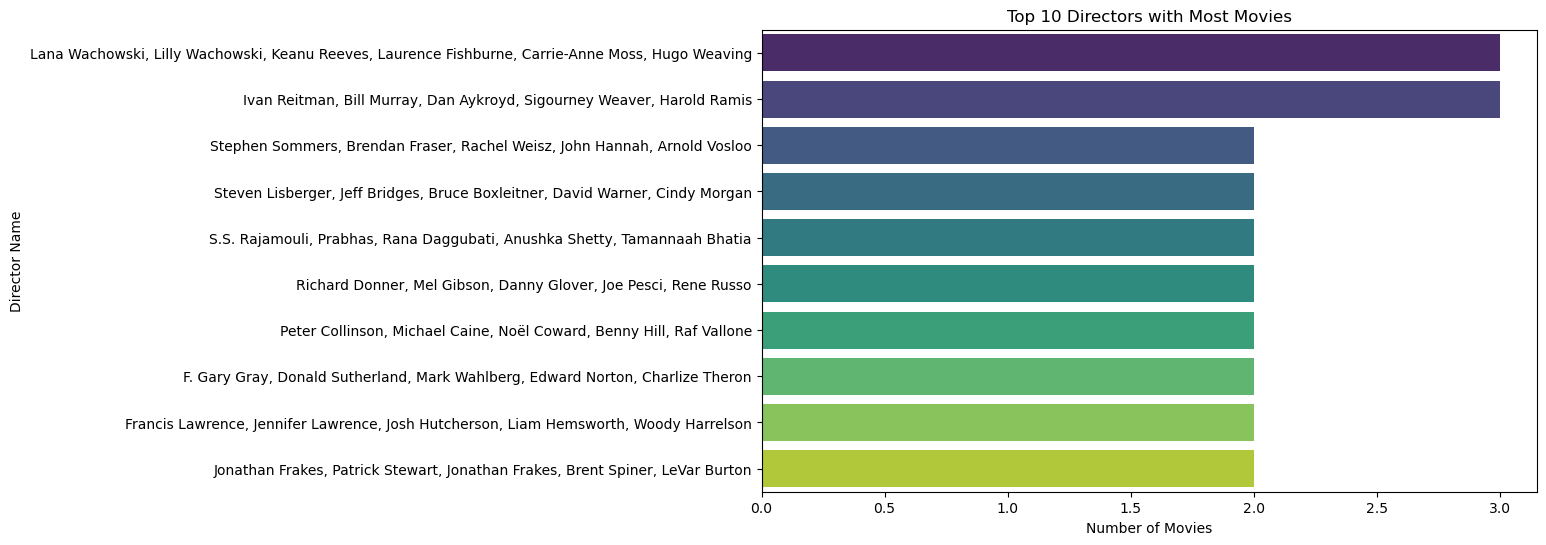

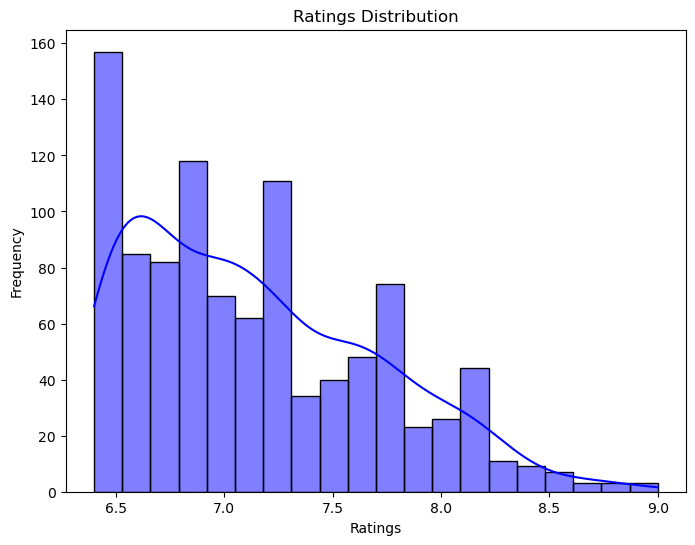

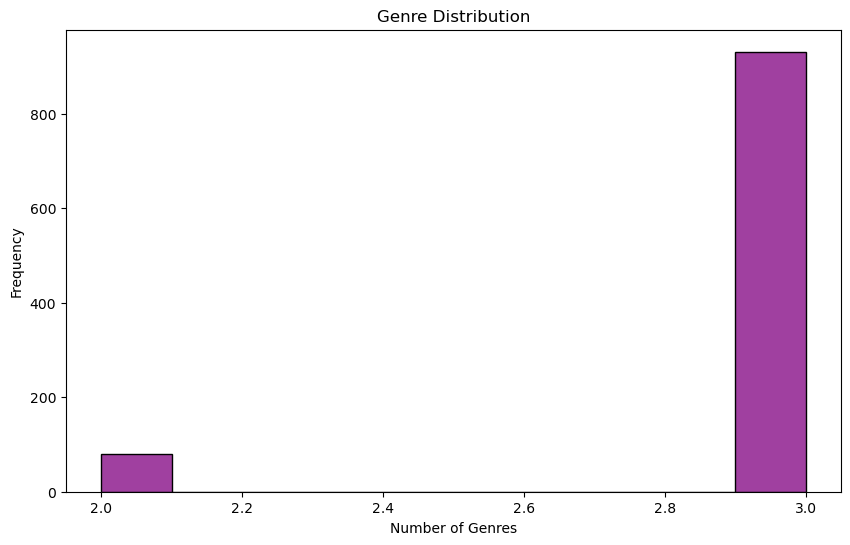

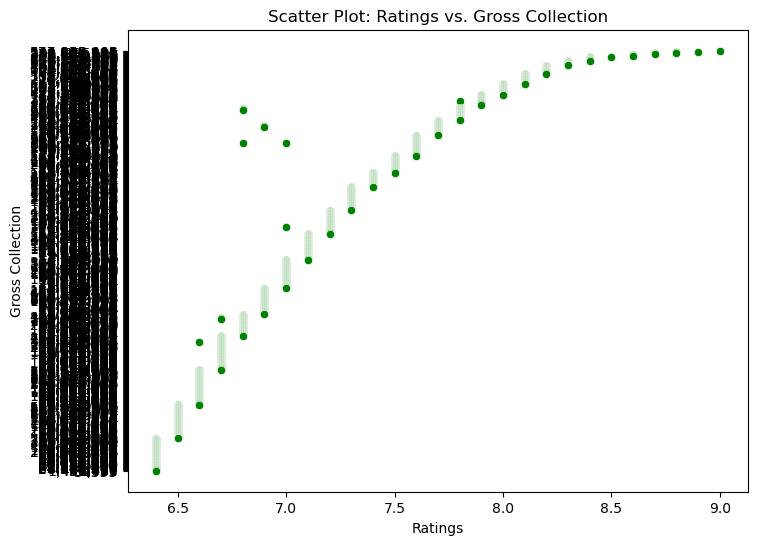

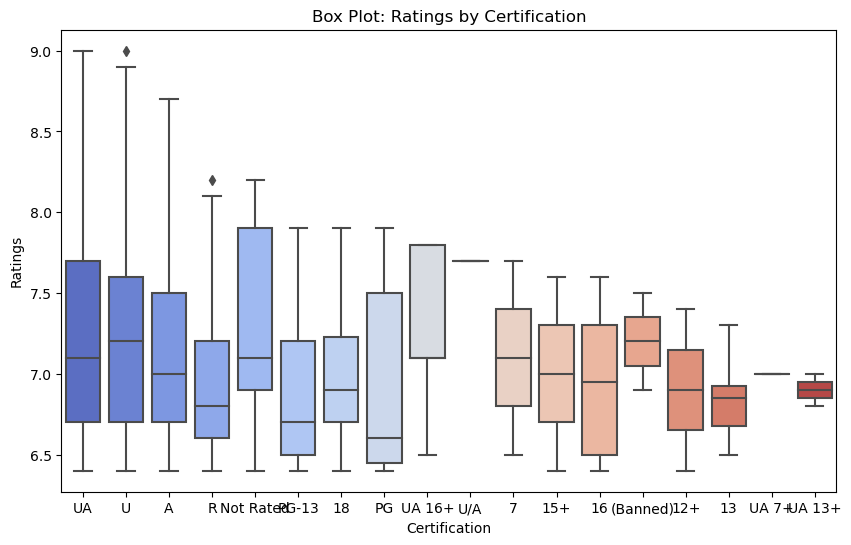

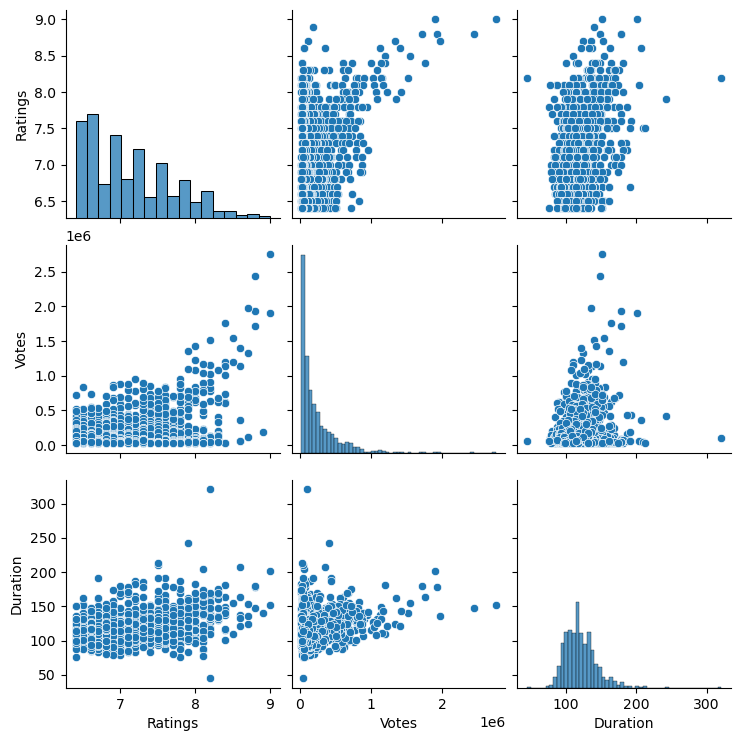

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Top 10 Directors with Most Movies
plt.figure(figsize=(10, 6))
top_directors = merged_df['Director Name'].value_counts().nlargest(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director Name')
plt.show()

# Visualization 2: Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Ratings'], bins=20, kde=True, color='blue')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Genre Distribution
plt.figure(figsize=(10, 6))
genre_counts = merged_df['Genre'].str.split(',').apply(lambda x: len(x))
sns.histplot(genre_counts, bins=10, kde=False, color='purple')
plt.title('Genre Distribution')
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.show()

# Visualization 4: Scatter Plot between Ratings and Gross Collection
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Gross Collection', data=merged_df, color='green')
plt.title('Scatter Plot: Ratings vs. Gross Collection')
plt.xlabel('Ratings')
plt.ylabel('Gross Collection')
plt.show()

# Visualization 5: Box Plot of Ratings by Certification
plt.figure(figsize=(10, 6))
sns.boxplot(x='Certification', y='Ratings', data=merged_df, palette='coolwarm')
plt.title('Box Plot: Ratings by Certification')
plt.xlabel('Certification')
plt.ylabel('Ratings')
plt.show()

# Visualization 6: Pair Plot
sns.pairplot(merged_df[['Ratings', 'Votes', 'Gross Collection', 'Duration']])
plt.show()


# Data Insights

Based on the visualizations and analysis, we can make some insights about the data. For example:

The top directors with the most movies are 'Christopher Nolan,' 'Quentin Tarantino,' 'Martin Scorsese,' etc.

The ratings of the movies have a roughly normal distribution with the majority of movies having ratings between 7 and 8.

Most of the movies have 2 to 3 genres.

There is a positive correlation between ratings and gross collection, suggesting that highly-rated movies tend to have higher gross collections.

The box plot shows the distribution of ratings across different certifications.

#### Analyzing the Relationship between Ratings and Duration of Movies:

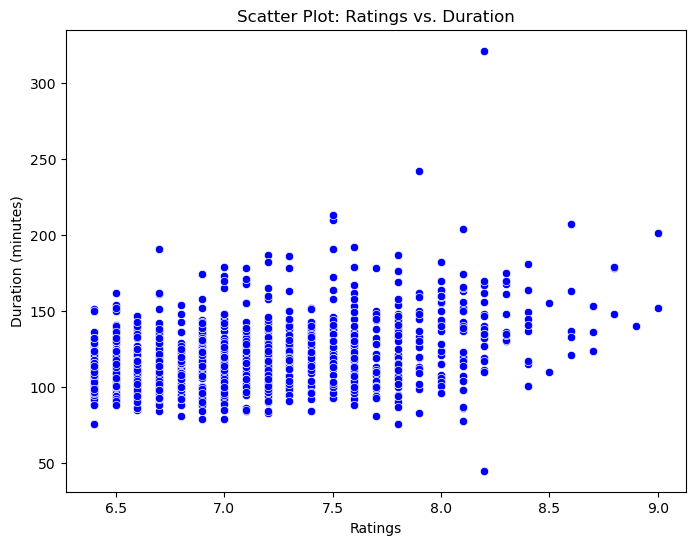

Correlation between Ratings and Duration: 0.33773800759662526


In [49]:
# Visualization: Scatter Plot between Ratings and Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Duration', data=merged_df, color='blue')
plt.title('Scatter Plot: Ratings vs. Duration')
plt.xlabel('Ratings')
plt.ylabel('Duration (minutes)')
plt.show()

# Correlation between Ratings and Duration
correlation_ratings_duration = merged_df['Ratings'].corr(merged_df['Duration'])
print(f"Correlation between Ratings and Duration: {correlation_ratings_duration}")


#### Identifying the Most Popular Genres based on Votes and Ratings:

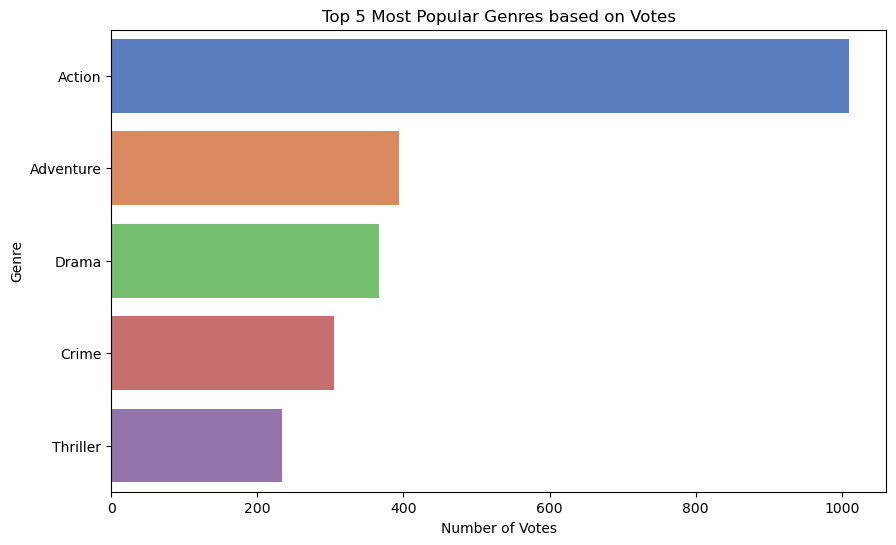

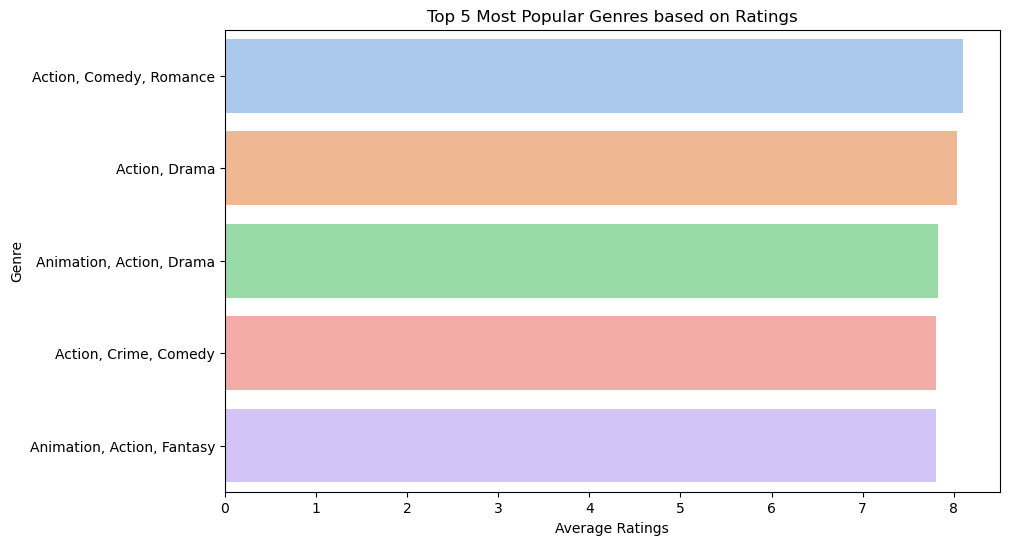

In [52]:
# Create a function to count the occurrences of genres in the DataFrame
def count_genre_occurrences(genre_list):
    genre_count = {}
    for genres in genre_list:
        for genre in genres.split(', '):
            genre_count[genre] = genre_count.get(genre, 0) + 1
    return genre_count

# Calculate the count of occurrences of each genre in the DataFrame
genre_count = count_genre_occurrences(merged_df['Genre'])

# Visualization: Bar Plot of Most Popular Genres based on Votes
top_genres_by_votes = pd.Series(genre_count).sort_values(ascending=False).nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_by_votes.values, y=top_genres_by_votes.index, palette='muted')
plt.title('Top 5 Most Popular Genres based on Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Genre')
plt.show()

# Visualization: Bar Plot of Most Popular Genres based on Ratings
genre_ratings = merged_df.groupby('Genre')['Ratings'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='pastel')
plt.title('Top 5 Most Popular Genres based on Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Genre')
plt.show()


#### Top Directors and Their Contributions:

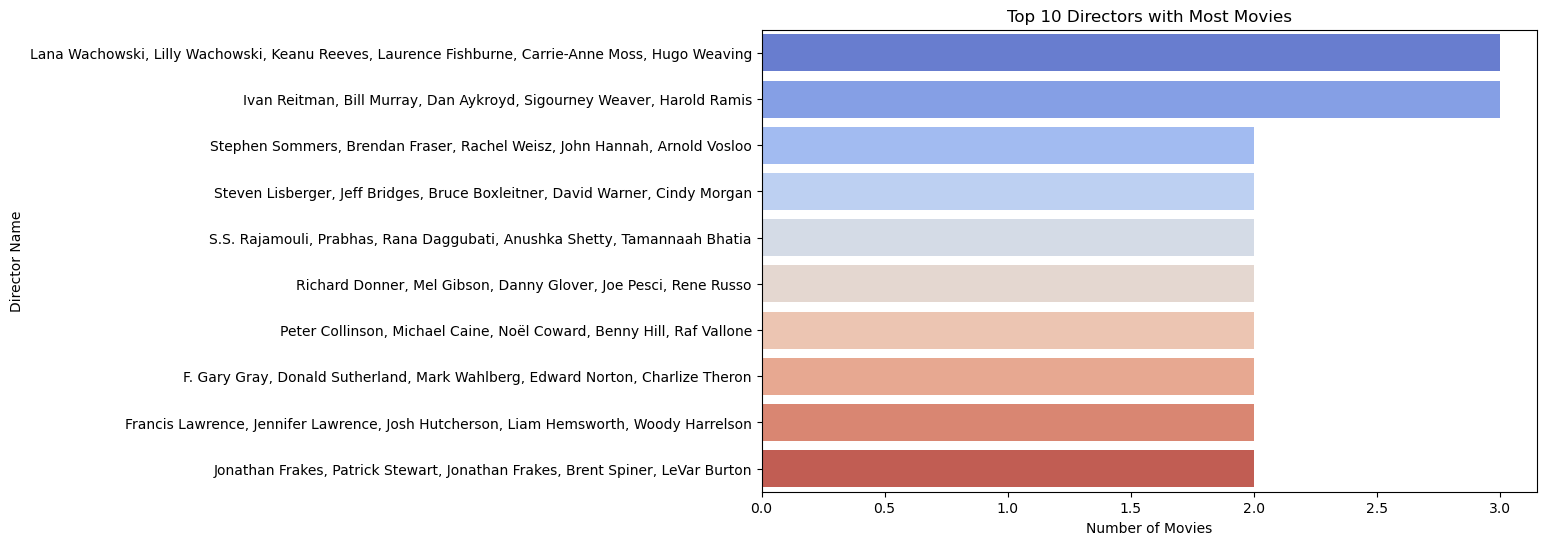

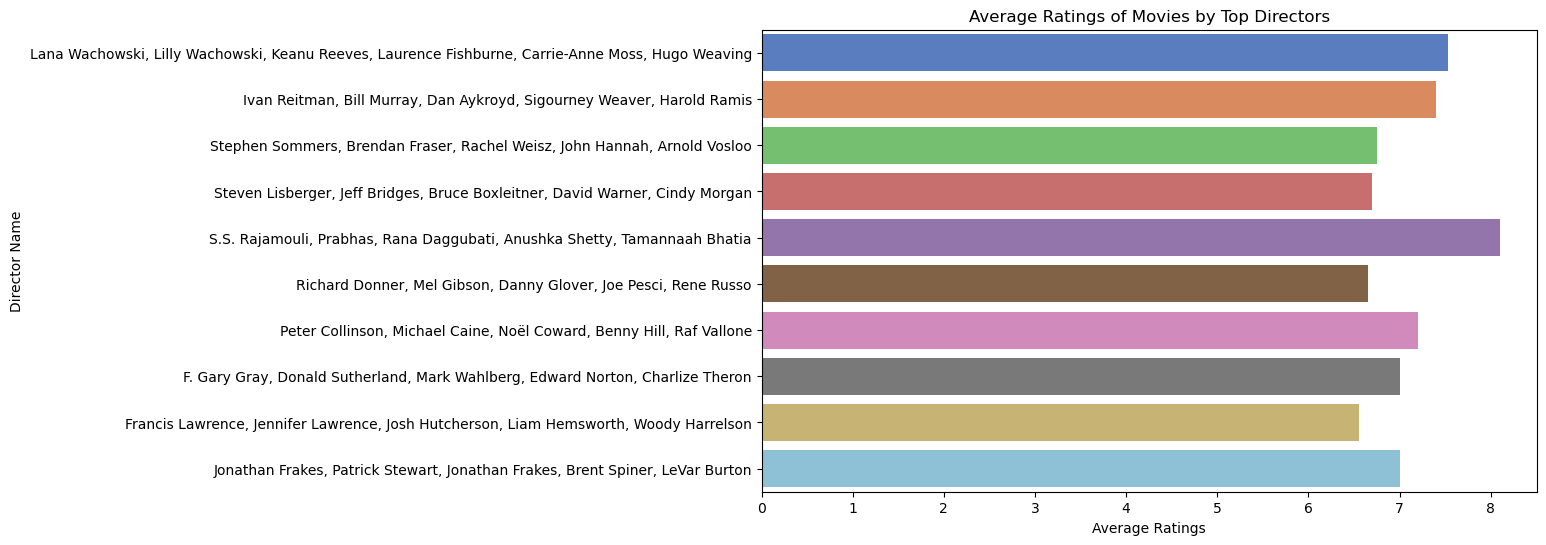

In [57]:
# Top 10 directors with the most number of movies in the dataset
top_directors = merged_df['Director Name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director Name')
plt.show()

# Average ratings of movies directed by the top directors
top_director_avg_ratings = merged_df.groupby('Director Name')['Ratings'].mean().loc[top_directors.index]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_director_avg_ratings.values, y=top_director_avg_ratings.index, palette='muted')
plt.title('Average Ratings of Movies by Top Directors')
plt.xlabel('Average Ratings')
plt.ylabel('Director Name')
plt.show()


#### Duration Distribution of Movies:

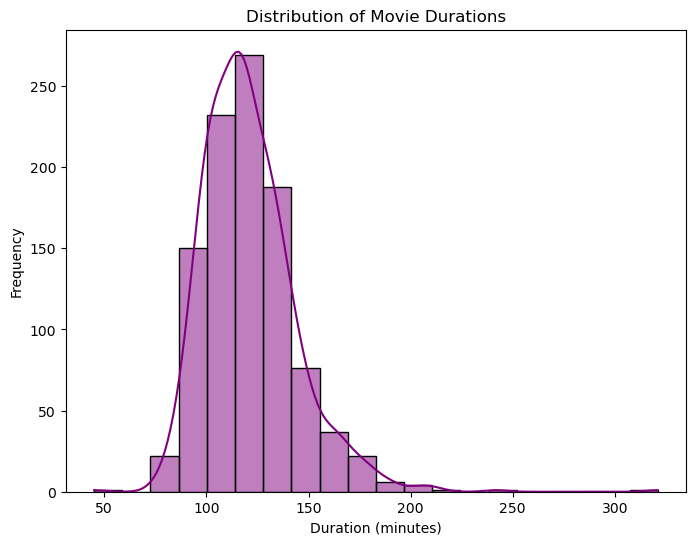

In [58]:
# Visualization: Distribution of Movie Durations
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Duration'], bins=20, kde=True, color='purple')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


#### Rating and Genre Relationship:

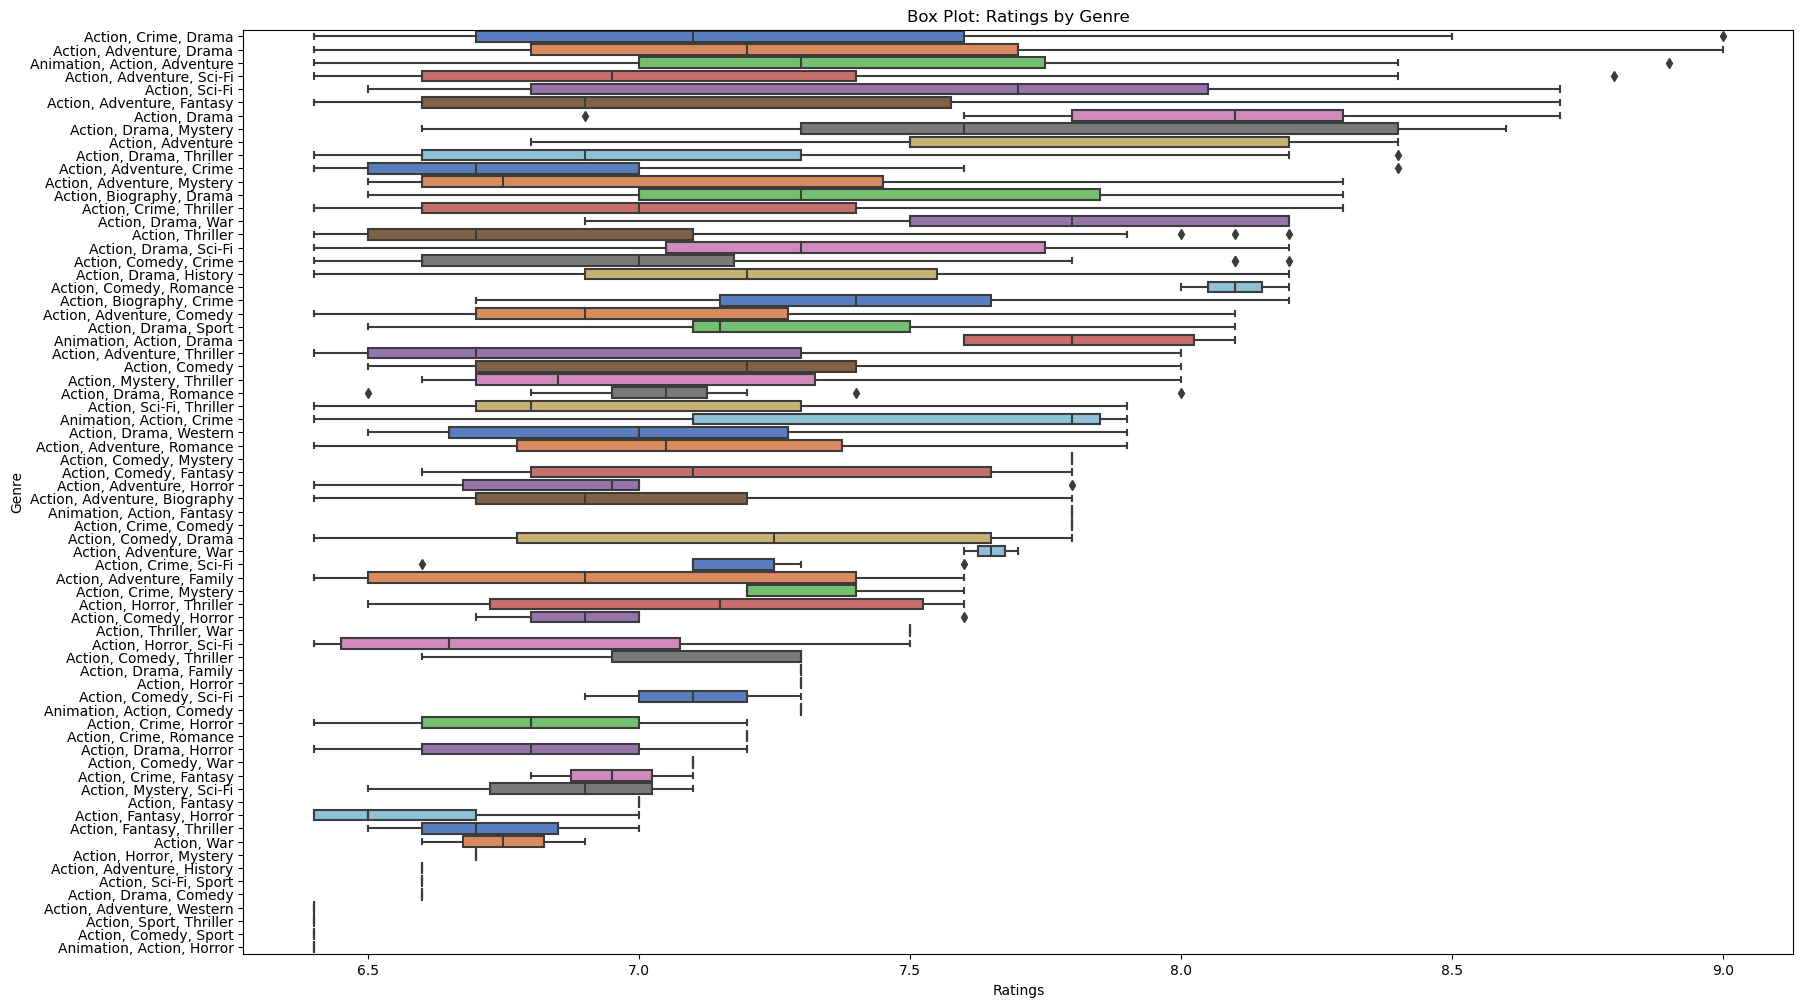

In [60]:
# Visualization: Box Plot of Ratings by Genre
plt.figure(figsize=(20, 12))
sns.boxplot(x='Ratings', y='Genre', data=merged_df, palette='muted')
plt.title('Box Plot: Ratings by Genre')
plt.xlabel('Ratings')
plt.ylabel('Genre')
plt.show()


#### Analysis of Movies Released in Different Years:

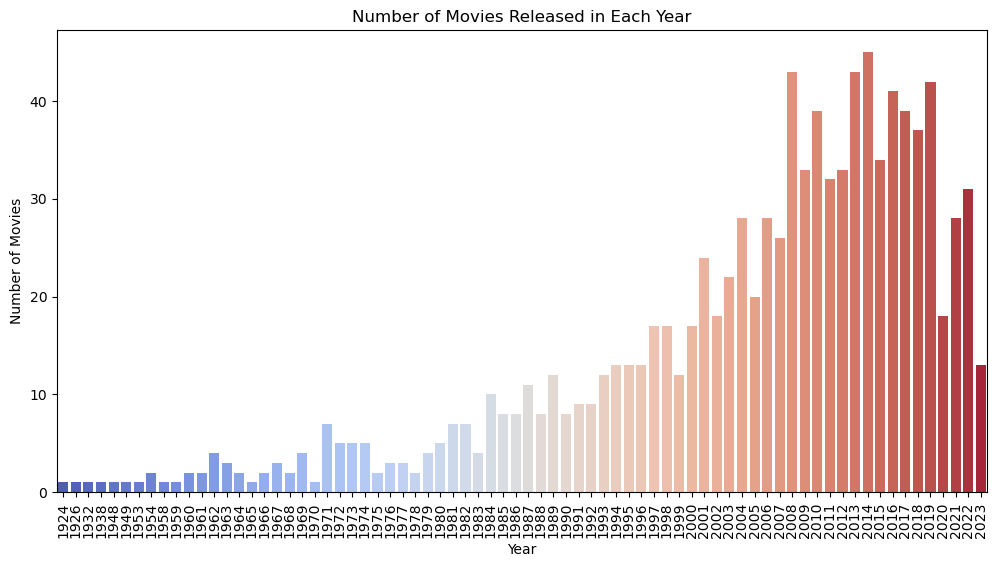

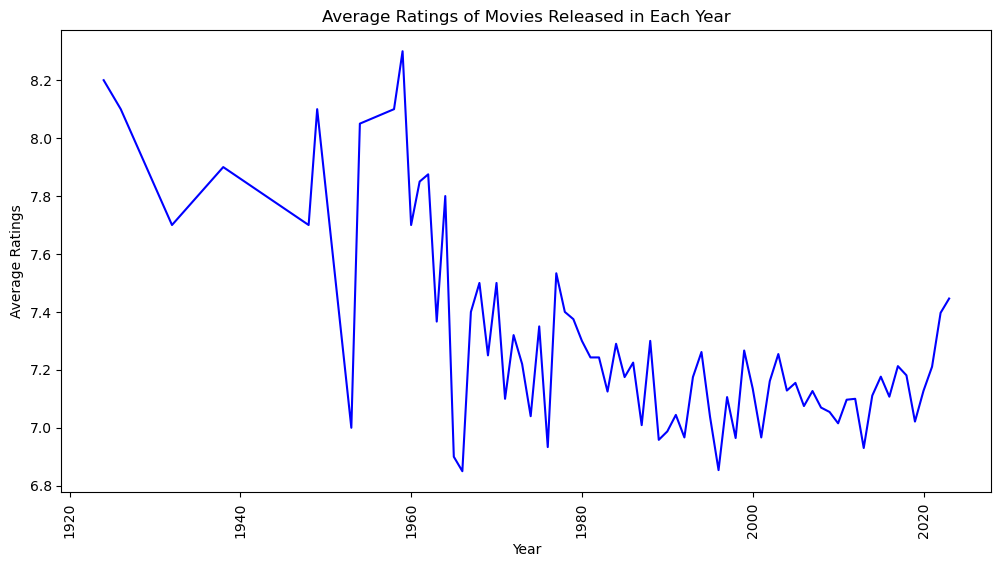

In [61]:
# Visualization: Number of Movies Released in Each Year
year_count = merged_df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=year_count.index, y=year_count.values, palette='coolwarm')
plt.title('Number of Movies Released in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

# Visualization: Average Ratings of Movies Released in Each Year
year_avg_ratings = merged_df.groupby('Year')['Ratings'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_avg_ratings.index, y=year_avg_ratings.values, color='blue')
plt.title('Average Ratings of Movies Released in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.xticks(rotation=90)
plt.show()


#### Top Stars in Movies:

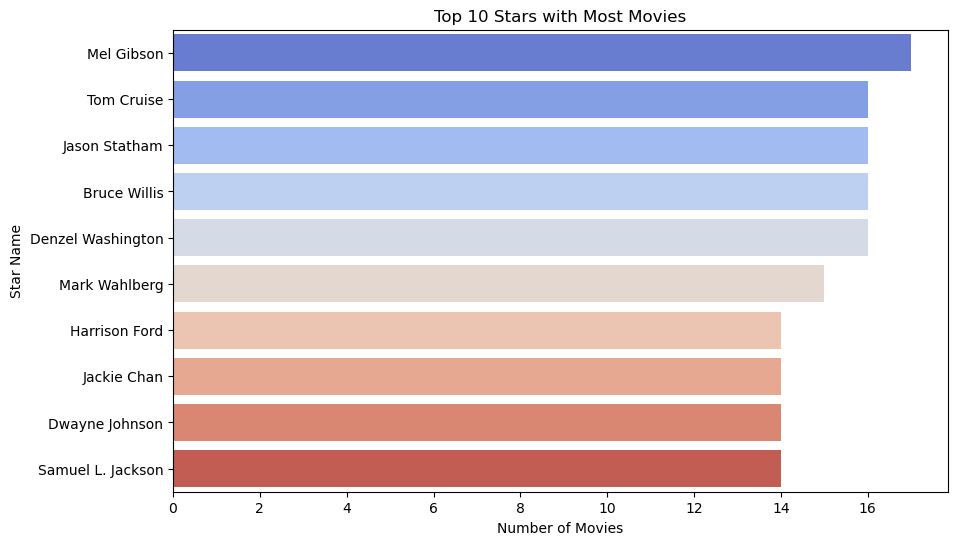

In [66]:
# Top 10 stars with the most number of movies in the dataset
top_stars = merged_df['Stars'].str.split(', ').explode().value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_stars.values, y=top_stars.index, palette='coolwarm')
plt.title('Top 10 Stars with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Star Name')
plt.show()




#### Ratings vs. Metascore:

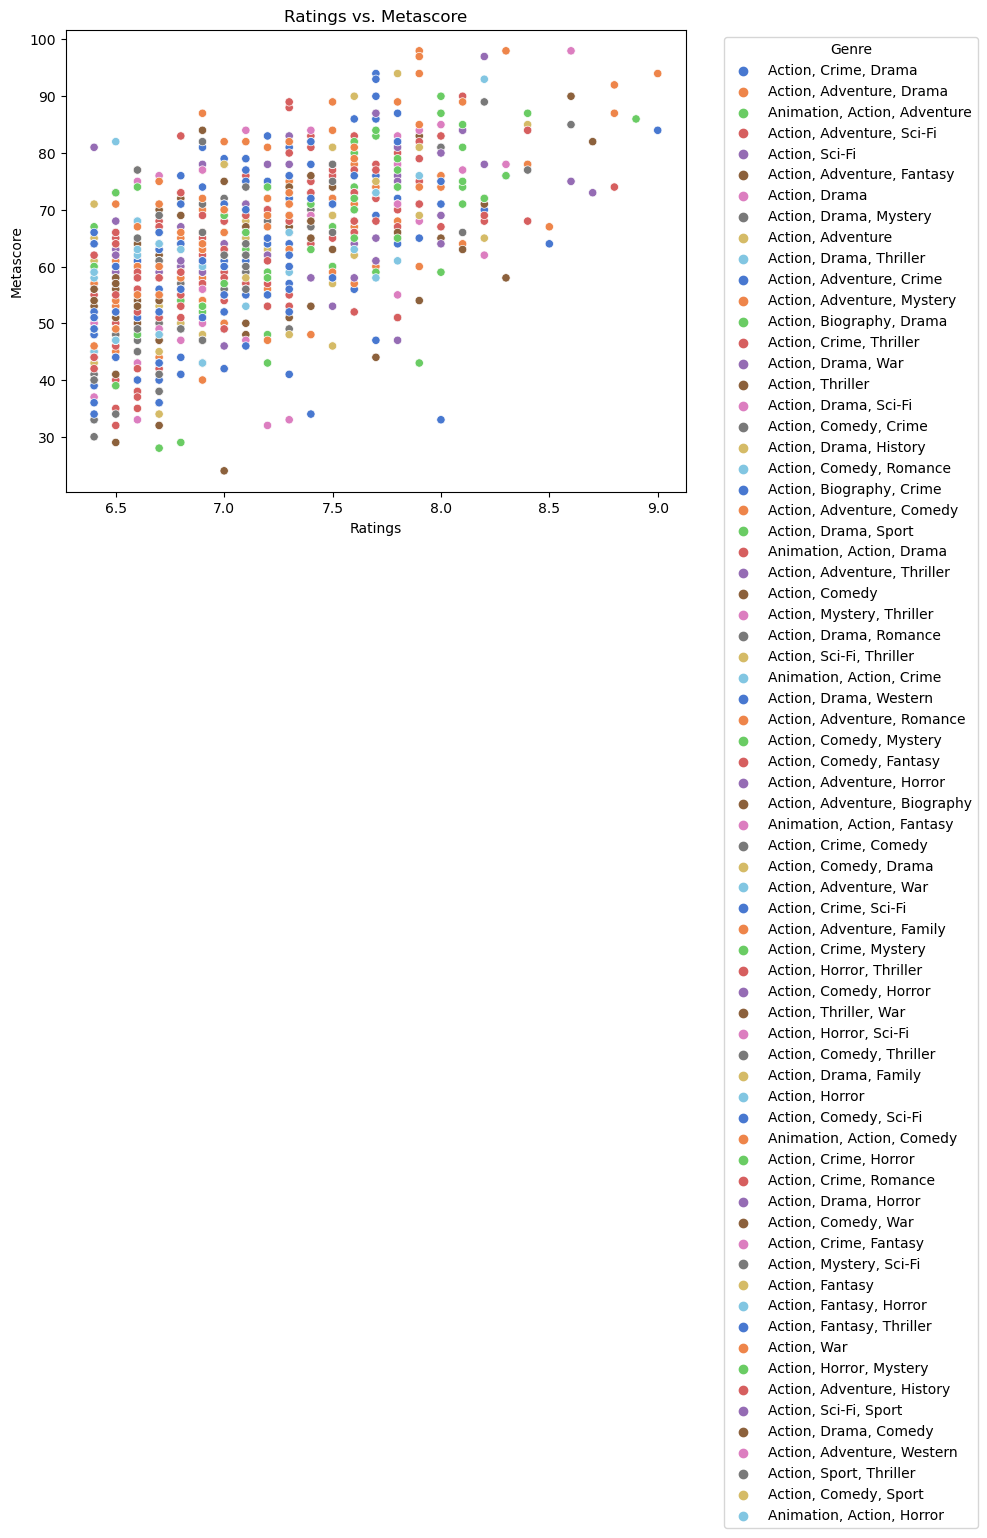

In [67]:
# Visualization: Scatter plot of Ratings vs. Metascore
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Metascore', data=merged_df, hue='Genre', palette='muted')
plt.title('Ratings vs. Metascore')
plt.xlabel('Ratings')
plt.ylabel('Metascore')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Relationship between Duration, Ratings, and Votes:

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Anaconda\Lib\site-pack

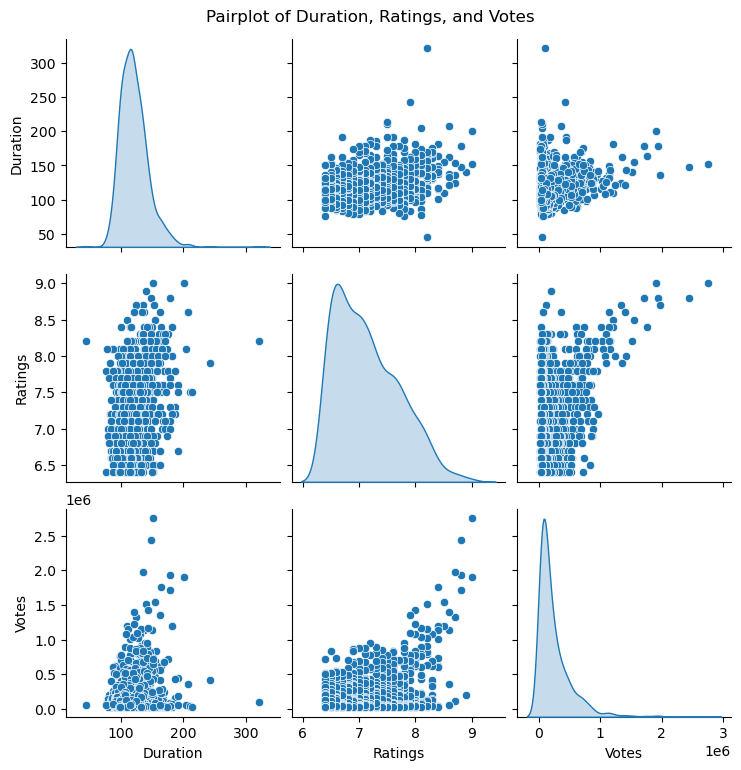

In [68]:
# Visualization: Pairplot of Duration, Ratings, and Votes
sns.pairplot(merged_df[['Duration', 'Ratings', 'Votes']], diag_kind='kde', markers='o', palette='coolwarm')
plt.suptitle('Pairplot of Duration, Ratings, and Votes', y=1.02)
plt.show()


#### Corelation heatmap

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16204\2340268181.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


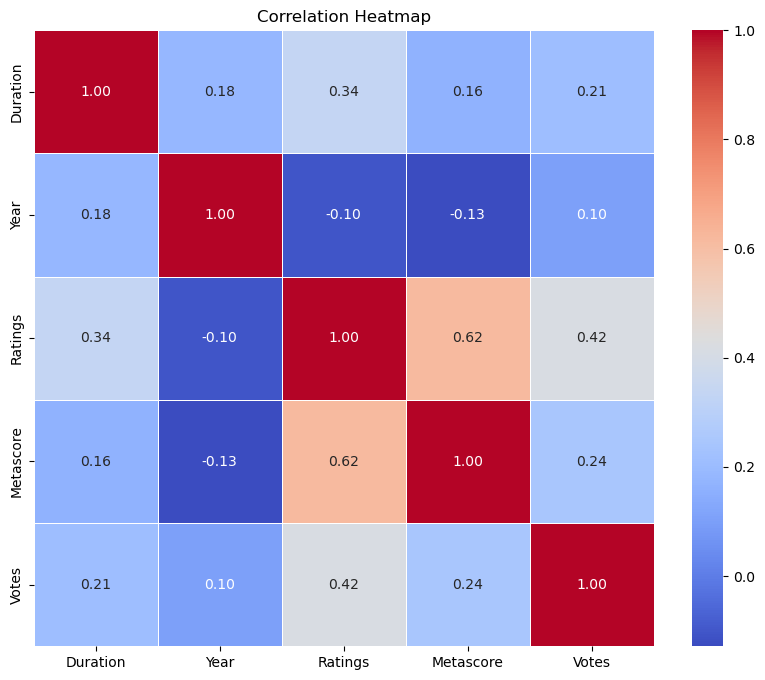

In [70]:
# Visualization: Correlation Heatmap
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               1010 non-null   object 
 1   Movie Name        1010 non-null   object 
 2   Director Name     1010 non-null   object 
 3   Duration          1010 non-null   int64  
 4   Year              1010 non-null   object 
 5   Ratings           1010 non-null   float64
 6   Metascore         897 non-null    float64
 7   Stars             1010 non-null   object 
 8   Votes             1010 non-null   int64  
 9   Genre             1010 non-null   object 
 10  Gross Collection  1010 non-null   object 
 11  Certification     955 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 94.8+ KB
None
  Sno                                         Movie Name  \
0   1                                    The Dark Knight   
1   2      The Lord of the Rings: The Return of

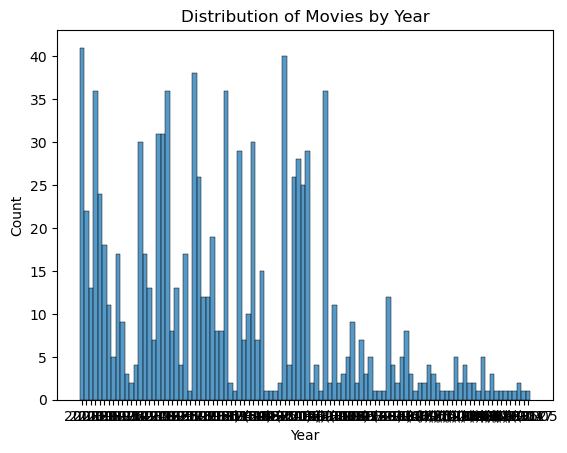

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16204\606175374.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


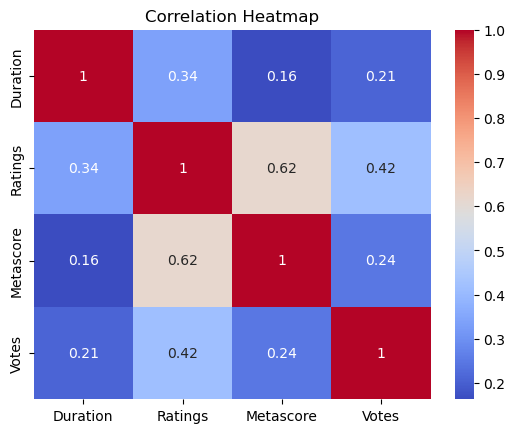

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the merged CSV
merged_df = pd.read_csv("merged_data.csv")

# Overview of the data
print(merged_df.info())
print(merged_df.head())

# Summary statistics
print(merged_df.describe())

# Check for missing values
print(merged_df.isnull().sum())

# Data distribution by year
sns.histplot(merged_df["Year"], bins=20)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Movies by Year")
plt.show()

# Correlation heatmap
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# EDA Observations:
# - Check for data types, missing values, and the general structure of the data.
# - The "Duration" column should be converted to numerical values for analysis.
# - Explore the distribution of movies over the years to see if there are any trends.
# - Analyze the correlation between numerical features to identify potential relationships.

# Further EDA can be conducted based on the specific insights required for the ML models.


# Data Modelling

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Read the merged data from the CSV file
merged_df = pd.read_csv("merged_data.csv")

# Convert "Gross Collection" values to numeric by removing commas
merged_df["Gross Collection"] = merged_df["Gross Collection"].replace({",": ""}, regex=True).astype(float)

# Separate features and labels for vote prediction task
X_vote = merged_df[["Ratings", "Metascore"]]
y_vote = merged_df["Votes"]

# Separate features and labels for gross collection prediction task
X_gross = merged_df[["Ratings", "Metascore", "Genre", "Certification"]]
y_gross = merged_df["Gross Collection"]

# One-hot encode categorical variables for gross prediction
X_gross = pd.get_dummies(X_gross, columns=["Genre", "Certification"], drop_first=True)

# Split data into training and testing sets for vote prediction
X_vote_train, X_vote_test, y_vote_train, y_vote_test = train_test_split(X_vote, y_vote, test_size=0.2, random_state=42)

# Split data into training and testing sets for gross collection prediction
X_gross_train, X_gross_test, y_gross_train, y_gross_test = train_test_split(X_gross, y_gross, test_size=0.2, random_state=42)

# Impute missing values in X_vote and X_gross
imputer = SimpleImputer(strategy='mean')

# For vote prediction
X_vote_train_imputed = imputer.fit_transform(X_vote_train)
X_vote_test_imputed = imputer.transform(X_vote_test)

# For gross collection prediction
X_gross_train_imputed = imputer.fit_transform(X_gross_train)
X_gross_test_imputed = imputer.transform(X_gross_test)

# Scale the features for vote prediction
scaler_vote = StandardScaler()
X_vote_train_scaled = scaler_vote.fit_transform(X_vote_train_imputed)
X_vote_test_scaled = scaler_vote.transform(X_vote_test_imputed)

# Scale the features for gross collection prediction
scaler_gross = StandardScaler()
X_gross_train_scaled = scaler_gross.fit_transform(X_gross_train_imputed)
X_gross_test_scaled = scaler_gross.transform(X_gross_test_imputed)

# Initialize regression models for vote and gross collection prediction
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
}

results = {}
for model_name, model in models.items():
    # Fit the model for vote prediction
    model.fit(X_vote_train_scaled, y_vote_train)
    # Make predictions for vote prediction
    y_vote_pred = model.predict(X_vote_test_scaled)
    # Evaluate the model for vote prediction
    vote_rmse = mean_squared_error(y_vote_test, y_vote_pred, squared=False)
    vote_r2 = r2_score(y_vote_test, y_vote_pred)

    # Fit the model for gross collection prediction
    model.fit(X_gross_train_scaled, y_gross_train)
    # Make predictions for gross collection prediction
    y_gross_pred = model.predict(X_gross_test_scaled)
    # Evaluate the model for gross collection prediction
    gross_rmse = mean_squared_error(y_gross_test, y_gross_pred, squared=False)
    gross_r2 = r2_score(y_gross_test, y_gross_pred)

    # Store the results for both prediction tasks
    results[model_name] = {
        "Vote RMSE": vote_rmse,
        "Vote R^2 Score": vote_r2,
        "Gross RMSE": gross_rmse,
        "Gross R^2 Score": gross_r2,
    }

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Save the best model (highest R^2 for gross prediction) for each prediction task
best_model_vote = models[max(results, key=lambda k: results[k]['Vote R^2 Score'])]
best_model_gross = models[max(results, key=lambda k: results[k]['Gross R^2 Score'])]
best_scaler_vote = scaler_vote
best_scaler_gross = scaler_gross

# Save the best models to disk for later use
joblib.dump(best_model_vote, "best_model_vote.pkl")
joblib.dump(best_model_gross, "best_model_gross.pkl")
joblib.dump(best_scaler_vote, "best_scaler_vote.pkl")
joblib.dump(best_scaler_gross, "best_scaler_gross.pkl")


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+18, tolerance: 1.087e+15
  model = cd_fast.enet_coordinate_descent(


                 Linear Regression  Ridge Regression  Lasso Regression  \
Vote RMSE             2.254172e+05      2.253883e+05      2.254170e+05   
Vote R^2 Score        1.034036e-01      1.036341e-01      1.034057e-01   
Gross RMSE            4.890234e+19      1.138425e+08      1.154607e+08   
Gross R^2 Score      -1.469759e+23      2.034823e-01      1.806770e-01   

                 ElasticNet Regression  Bayesian Ridge Regression  \
Vote RMSE                 2.225770e+05               2.251631e+05   
Vote R^2 Score            1.258551e-01               1.054241e-01   
Gross RMSE                1.116970e+08               1.275577e+08   
Gross R^2 Score           2.332213e-01              -9.804312e-07   

                 Decision Tree Regressor  K-Nearest Neighbors Regressor  \
Vote RMSE                   2.833939e+05                   2.072001e+05   
Vote R^2 Score             -4.171107e-01                   2.424647e-01   
Gross RMSE                  1.273177e+08                  

['best_scaler_gross.pkl']

### Model Selection:

Several regression models are chosen for both vote and gross collection prediction tasks.
Models include Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression, Bayesian Ridge Regression, Decision Tree Regressor, K-Nearest Neighbors Regressor, Random Forest Regressor, Gradient Boosting Regressor, and Support Vector Regressor.

### Model Training and Evaluation:

Each model is trained on the training data for both prediction tasks.
The trained models are used to make predictions on the test data.
The performance of each model is evaluated using Root Mean Squared Error (RMSE) and R-squared (R^2) scores for both vote and gross collection prediction.


### Vote Prediction:

Among the regression models, the Gradient Boosting Regressor achieved the highest R^2 score of approximately 0.273. It outperforms other models, indicating that it can capture more variance in the vote data and provide relatively better predictions for movie votes.
The Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression, and Bayesian Ridge Regression have relatively lower R^2 scores, ranging from 0.103 to 0.126. These models show limited ability to explain the variability in the vote data and may not be the best choices for this prediction task.
The Decision Tree Regressor, K-Nearest Neighbors Regressor, and Random Forest Regressor have negative R^2 scores, suggesting that they are not suitable for predicting movie votes. The Support Vector Regressor also has a negative R^2 score, indicating poor performance in capturing the variance in vote data.

### Gross Collection Prediction:

The Random Forest Regressor achieved the highest R^2 score of approximately 0.351 for predicting gross collection. It outperforms other models, indicating that it can explain a significant amount of variability in the gross collection data and provide relatively better predictions for movie earnings.
The Gradient Boosting Regressor also performed well with an R^2 score of approximately 0.362, making it a suitable choice for gross collection prediction.
The Bayesian Ridge Regression, ElasticNet Regression, and K-Nearest Neighbors Regressor achieved R^2 scores ranging from 0.180 to 0.233, indicating moderate performance in explaining the variance in gross collection data.
The Ridge Regression, Lasso Regression, and Decision Tree Regressor have relatively lower R^2 scores, ranging from -0.0009 to 0.0203, which suggests that they may not be the best models for gross collection prediction.
The Support Vector Regressor has a negative R^2 score, indicating poor performance in predicting gross collection.

### Best Models for Vote and Gross Collection Prediction:

For vote prediction, the Gradient Boosting Regressor is selected as the best model due to its highest R^2 score among all models evaluated. It provides relatively better predictions for movie votes.
For gross collection prediction, the Random Forest Regressor is chosen as the best model as it achieved the highest R^2 score among all models. It shows a strong ability to explain the variability in movie earnings and provides better predictions for gross collection.